# Problem Statement: Predicting NHL Player Salaries Using Present and Historic Data

## Objective
The objective of this project is to develop a predictive model that accurately estimates the salaries of NHL players based on a comprehensive dataset containing both present and historical data. This model will help teams, analysts, and stakeholders in the NHL make informed financial decisions, optimize player contracts, and manage team budgets more effectively.

## Data Description
The dataset provided for this project includes detailed information about NHL players, which is divided into training and testing sets. The dataset is structured as follows:

- Training Set: Contains data for 612 NHL players.
- Testing Set: Contains data for 262 NHL players.
- Features: Each player is described by 153 features, which include but are not limited to:
> - Demographic Information: Age, nationality, position, etc.
> - Performance Metrics: Goals, assists, points, plus-minus rating, penalty minutes, etc.
> - Historical Data: Career statistics, year-over-year performance, injuries, etc.
> - Contract Details: Previous salary, contract duration, bonuses, etc.
> - Other Variables: Team success, player marketability, etc.

## Problem
The main challenge is to build a robust predictive model that can generalize well to new, unseen data (i.e., the testing set). Given the high dimensionality of the dataset with 153 features, feature selection and engineering will play a crucial role in the model development process.

## Goals
1. Data Preprocessing:

Clean and preprocess the data to handle missing values, outliers, and inconsistencies.
Normalize and standardize the features to ensure they are on comparable scales.

2. Feature Selection:

Identify the most relevant features that contribute significantly to the prediction of player salaries.
Reduce dimensionality to improve model performance and interpretability.

3. Model Development:

Experiment with various regression models (e.g., linear regression, ridge regression, lasso regression, decision trees, random forests, gradient boosting machines, etc.).
Evaluate models using appropriate metrics (e.g., mean squared error, R-squared, mean absolute error) on the training set using cross-validation.

4. Model Evaluation:

Assess the final model's performance on the testing set to ensure it generalizes well to unseen data.
Perform error analysis to identify any patterns in the residuals and refine the model accordingly.

5. Interpretability:

Provide insights into the most influential features that drive player salaries.
Ensure the model's predictions are interpretable and justifiable for stakeholders.

## Deliverables
- A cleaned and preprocessed dataset ready for modeling.
- A detailed report on feature selection and engineering.
- A trained predictive model capable of estimating NHL player salaries.
- A comprehensive evaluation of the model's performance on the testing set.
- Visualizations and insights that explain the key factors influencing salary predictions.

## Impact
Accurately predicting NHL player salaries will enable teams to make data-driven decisions, optimize salary cap management, and potentially gain a competitive edge in player negotiations and team composition. This project will also contribute to the broader field of sports analytics by demonstrating the value of integrating diverse data sources for predictive modeling.

# Importing Libraries/Packages

In [ ]:
import os

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import plotly as py

# from plotly.offline import init_notebook_mode, iplot
# init_notebook_mode(connected=True)
import plotly.graph_objs as go
# import plotly.offline as offline
# offline.init_notebook_mode()

print(f"-"*70)
print(f"Successcully Loaded all the Libraries For Data and Visualization")
print(f"-"*70)

----------------------------------------------------------------------
Successcully Loaded all the Libraries For Data and Visualization
----------------------------------------------------------------------


In [ ]:
# Configuring pandas
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

print(f"-"*70)
print(f"Successcully configured pandas to load all the rows and columns.")
print(f"-"*70)

----------------------------------------------------------------------
Successcully configured pandas to load all the rows and columns.
----------------------------------------------------------------------


In [ ]:
trainDF = pd.read_csv("./Data/train.csv", encoding='latin1')
test = pd.read_csv("./Data/test.csv", encoding='latin1')
test_target = pd.read_csv("./Data/test_salaries.csv", encoding='latin1')

print(f"-"*70)
print(f"Successcully loaded the Datasets.")
print(f"-"*70)

----------------------------------------------------------------------
Successcully loaded the Datasets.
----------------------------------------------------------------------


In [ ]:
print(f"-"*70)

print(f"The Shape of the trainDF  :  {trainDF.shape}")
print(f"The Shape of the test  :  {test.shape}")
print(f"The Shape of the test_target  :  {test_target.shape}")

print(f"-"*70)


----------------------------------------------------------------------
The Shape of the trainDF  :  (612, 154)
The Shape of the test  :  (262, 153)
The Shape of the test_target  :  (262, 1)
----------------------------------------------------------------------


In [ ]:
trainDF.head()

,Salary,Born,City,Pr/St,Cntry,Nat,Ht,Wt,DftYr,DftRd,Ovrl,Hand,Last Name,First Name,Position,Team,GP,G,A,A1,A2,PTS,+/-,E+/-,PIM,Shifts,TOI,TOIX,TOI/GP,TOI/GP.1,TOI%,IPP%,SH%,SV%,PDO,F/60,A/60,Pct%,Diff,Diff/60,iCF,iCF.1,iFF,iSF,iSF.1,iSF.2,ixG,iSCF,iRB,iRS,iDS,sDist,sDist.1,Pass,iHF,iHF.1,iHA,iHDf,iMiss,iGVA,iTKA,iBLK,iGVA.1,iTKA.1,iBLK.1,BLK%,iFOW,iFOL,iFOW.1,iFOL.1,FO%,%FOT,dzFOW,dzFOL,nzFOW,nzFOL,ozFOW,ozFOL,FOW.Up,FOL.Up,FOW.Down,FOL.Down,FOW.Close,FOL.Close,OTG,1G,GWG,ENG,PSG,PSA,G.Bkhd,G.Dflct,G.Slap,G.Snap,G.Tip,G.Wrap,G.Wrst,CBar,Post,Over,Wide,S.Bkhd,S.Dflct,S.Slap,S.Snap,S.Tip,S.Wrap,S.Wrst,iPenT,iPenD,iPENT,iPEND,iPenDf,NPD,Min,Maj,Match,Misc,Game,CF,CA,FF,FA,SF,SA,xGF,xGA,SCF,SCA,GF,GA,RBF,RBA,RSF,RSA,DSF,DSA,FOW,FOL,HF,HA,GVA,TKA,PENT,PEND,OPS,DPS,PS,OTOI,Grit,DAP,Pace,GS,GS/G
0,925000,97-01-30,Sainte-Marie,QC,CAN,CAN,74,190,2015.0,1.0,18.0,L,Chabot,Thomas,D,OTT,1,0,0,0,0,0,-2,0.0,0,13,429,7.2,7.15,7.16,15.2,0.0,0.0,0.750,750.0,0.00,16.74,0.0,-2,-16.74,2.0,2,2.0,1.0,1,1,0.0,0.0,0.0,0.0,0.0,43.0,49.3,0.0,1,1.0,0.0,1.0,1,1,0,0,1.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0.0,0.0,0,0.0,0,0,0,0,0,9.0,12.0,8.0,10.0,5.0,8.0,0.5,0.9,2.0,3.0,0.0,2.0,1.0,1.0,0.0,1.0,1,2,4.0,5.0,1.0,2.0,1.0,1.0,1.0,1.0,0.0,-0.2,-0.2,40.03,1,0.0,175.7,-0.4,-0.38
1,2250000,93-12-21,Ottawa,ON,CAN,CAN,74,207,2012.0,1.0,15.0,R,Ceci,Cody,D,OTT,79,2,15,6,9,17,-11,-10.4,20,2418,109992,1826.2,23.20,23.17,39.0,30.4,7.4,0.915,989.0,1.84,2.79,39.7,-29,-0.95,287.0,287,197.0,143.0,143,143,6.1,7.0,7.0,9.0,16.0,52.4,46.3,138.1,111,111.0,154.0,-43.0,54,74,22,159,74.0,22.0,159.0,8.0,1,0,1.0,0.0,100.0,0.1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,2,51,2,0,49,12,0,1,79,10,6,10.0,5.0,-4,2.2,10,0,0,0,0,1433.0,1992.0,1038.0,1423.0,757.0,997.0,62.0,88.8,197.0,280.0,56.0,85.0,68.0,82.0,79.0,94.0,147,176,949.0,939.0,749.0,671.0,284.0,197.0,104.0,98.0,-0.2,3.4,3.2,2850.59,290,13.3,112.5,14.1,0.18
2,8000000,88-04-16,St. Paul,MN,USA,USA,72,218,2006.0,1.0,7.0,R,Okposo,Kyle,RW,BUF,65,19,26,13,13,45,-7,-1.4,24,1443,73983,1229.2,18.97,18.95,33.1,63.4,9.7,0.934,1031.0,3.47,1.95,64.0,31,1.51,283.0,283,212.0,155.0,156,156,17.4,64.0,16.0,20.0,36.0,28.4,26.3,196.8,53,53.0,68.0,-15.0,57,36,26,25,36.0,26.0,25.0,2.4,54,45,54.0,45.0,54.5,7.4,9,6,10,11,35,28,13,10,21,16,37,33,1,5,2,0,0,0,5,2,0,3,0,0,9,0,2,4,51,19,3,3,20,8,2,101,12,10,11.0,8.0,-2,-0.5,12,0,0,0,0,1301.0,1051.0,986.0,826.0,734.0,606.0,70.8,46.4,235.0,133.0,71.0,40.0,60.0,34.0,76.0,52.0,136,86,739.0,600.0,340.0,351.0,168.0,129.0,56.0,70.0,3.7,1.3,5.0,2486.75,102,6.6,114.8,36.8,0.57
3,3500000,92-01-07,Ottawa,ON,CAN,CAN,77,220,2010.0,1.0,3.0,R,Gudbranson,Erik,D,VAN,30,1,5,5,0,6,-14,-5.3,18,765,36603,607.9,20.33,20.31,36.1,37.5,6.2,0.897,959.0,1.58,3.45,31.4,-19,-1.88,88.0,88,55.0,40.0,40,40,1.4,2.0,1.0,4.0,5.0,55.1,51.0,153.0,66,66.0,66.0,0.0,15,23,4,44,23.0,4.0,44.0,7.3,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,15,0,0,18,3,0,0,19,6,7,6.0,6.0,1,2.7,4,2,0,0,0,460.0,605.0,339.0,467.0,259.0,340.0,22.0,33.6,80.0,130.0,16.0,35.0,27.0,20.0,29.0,32.0,56,52,324.0,328.0,198.0,197.0,86.0,59.0,26.0,22.0,0.0,0.4,0.5,1074.41,130,17.5,105.1,5.9,0.20
4,1750000,94-03-29,Toronto,ON,CAN,CAN,76,217,2012.0,1.0,16.0,R,Wilson,Tom,RW,WSH,82,7,12,4,8,19,9,4.1,133,1453,63592,1059.7,12.93,12.93,23.5,61.3,7.8,0.917,995.0,1.76,2.32,43.1,-10,-0.57,166.0,166,118.0,95.0,95,95,9.3,35.0,8.0,10.0,18.0,30.9,26.4,96.3,239,239.0,134.0,105.0,23,21,36,44,21.0,36.0,44.0,4.4,3,7,3.0,7.0,30.0,1.0,1,1,0,2,2,4,3,1,0,3,2,6,0,2,0,1,0,0,0,0,0,0,1,0,6,0,2,1,20,7,2,3,10,11,1,61,44,33,40.0,29.0,-11,-14.3,33,9,0,1,1,766.0,992.0,546.0,720.0,398.0,495.0,33.5,47.5,124.0,159.0,31.0,41.0,30.0,37.0,43.0,53.0,73,90,528.0,490.0,512.0,422.0,157.0,126.0,88.0,68.0,-0.1,1.4,1.3,3459.09,425,8.3,99.5,21.8,0.27


In [ ]:
trainDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 612 entries, 0 to 611
Columns: 154 entries, Salary to GS/G
dtypes: float64(73), int64(71), object(10)
memory usage: 736.4+ KB


In [ ]:
trainDF.dtypes

Salary          int64
Born           object
City           object
Pr/St          object
Cntry          object
Nat            object
Ht              int64
Wt              int64
DftYr         float64
DftRd         float64
Ovrl          float64
Hand           object
Last Name      object
First Name     object
Position       object
Team           object
GP              int64
G               int64
A               int64
A1              int64
A2              int64
PTS             int64
+/-             int64
E+/-          float64
PIM             int64
Shifts          int64
TOI             int64
TOIX          float64
TOI/GP        float64
TOI/GP.1      float64
TOI%          float64
IPP%          float64
SH%           float64
SV%           float64
PDO           float64
F/60          float64
A/60          float64
Pct%          float64
Diff            int64
Diff/60       float64
iCF           float64
iCF.1           int64
iFF           float64
iSF           float64
iSF.1           int64
iSF.2     

In [ ]:
# Initialize counters for different data types
obj_cols = 0
float_cols = 0
int_cols = 0
other_cols = 0

# Iterate over columns and count data types
for col in trainDF.columns:
    if trainDF[col].dtype == 'object':
        obj_cols += 1
    elif trainDF[col].dtype == 'float64':
        float_cols += 1
    elif trainDF[col].dtype == 'int64':
        int_cols += 1
    else:
        other_cols += 1


print(f"-"*70)

print(f"Total number of 'object' cols in {len(trainDF.columns)} cols : {obj_cols}")
print(f"Total number of 'int64' cols in {len(trainDF.columns)} cols : {int_cols}")
print(f"Total number of 'float64' cols in {len(trainDF.columns)} cols : {float_cols}")
print(f"Total number of 'other' cols in {len(trainDF.columns)} cols : {other_cols}")

print(f"-"*70)

----------------------------------------------------------------------
Total number of 'object' cols in 154 cols : 10
Total number of 'int64' cols in 154 cols : 71
Total number of 'float64' cols in 154 cols : 73
Total number of 'other' cols in 154 cols : 0
----------------------------------------------------------------------


In [ ]:
trainDF.isnull().sum().sum()

579

## Feature Engineering and Visualization

In [ ]:
# Function to count null values for specific dtypes
def count_nulls_by_dtypes(df, dtype):
  # select columns of specific dtypes
  cols = df.select_dtypes(include=[dtype])

  # count null values
  null_vals = cols.isnull().sum().sum()

  return null_vals


# Count null values for different dtypes
nulls_obj = count_nulls_by_dtypes(trainDF, 'object')
nulls_int = count_nulls_by_dtypes(trainDF, 'int64')
nulls_float = count_nulls_by_dtypes(trainDF, 'float64')

print(f"-"*70)

print(f"\nTotal Null values : {trainDF.isnull().sum().sum()}")
print(f"\tNull values in 'object' columns : {nulls_obj}")
print(f"\tNull values in 'int64' columns : {nulls_int}")
print(f"\tNull values in 'float64' columns : {nulls_float}\n")

print(f"-"*70)

----------------------------------------------------------------------

Total Null values : 579
	Null values in 'object' columns : 153
	Null values in 'int64' columns : 0
	Null values in 'float64' columns : 426

----------------------------------------------------------------------


In [ ]:
trainDF.isnull().sum()

Salary          0
Born            0
City            0
Pr/St         153
Cntry           0
Nat             0
Ht              0
Wt              0
DftYr         100
DftRd         100
Ovrl          100
Hand            0
Last Name       0
First Name      0
Position        0
Team            0
GP              0
G               0
A               0
A1              0
A2              0
PTS             0
+/-             0
E+/-            0
PIM             0
Shifts          0
TOI             0
TOIX            1
TOI/GP          0
TOI/GP.1        0
TOI%            1
IPP%            1
SH%             2
SV%             1
PDO             2
F/60            1
A/60            1
Pct%            0
Diff            0
Diff/60         1
iCF             8
iCF.1           0
iFF             8
iSF             8
iSF.1           0
iSF.2           0
ixG             1
iSCF            1
iRB             8
iRS             1
iDS             7
sDist           0
sDist.1        16
Pass            1
iHF             0
iHF.1     

In [ ]:
# Function to return null values cols for specific dtypes
def null_cols_by_dtypes(df, dtype):
  # select columns of specific dtypes
  cols = df.select_dtypes(include=[dtype])

  # count null values
  null_cols = cols.isnull().sum()

  return null_cols


# # Count null values for different dtypes
nulls_obj = null_cols_by_dtypes(trainDF, 'object')
nulls_int = null_cols_by_dtypes(trainDF, 'int64')
nulls_float = null_cols_by_dtypes(trainDF, 'float64')

print(f"-"*70)

print(f"Null columns in 'object' columns : \n{nulls_obj}")
print(f"-"*70)
print(f"Null columns in 'int64' columns : \n{nulls_int}")
print(f"-"*70)
print(f"Null columns in 'float64' columns : \n{nulls_float}\n")

print(f"-"*70)

----------------------------------------------------------------------
Null columns in 'object' columns : 
Born            0
City            0
Pr/St         153
Cntry           0
Nat             0
Hand            0
Last Name       0
First Name      0
Position        0
Team            0
dtype: int64
----------------------------------------------------------------------
Null columns in 'int64' columns : 
Salary       0
Ht           0
Wt           0
GP           0
G            0
A            0
A1           0
A2           0
PTS          0
+/-          0
PIM          0
Shifts       0
TOI          0
Diff         0
iCF.1        0
iSF.1        0
iSF.2        0
iHF          0
iMiss        0
iGVA         0
iTKA         0
iBLK         0
iFOW         0
iFOL         0
dzFOW        0
dzFOL        0
nzFOW        0
nzFOL        0
ozFOW        0
ozFOL        0
FOW.Up       0
FOL.Up       0
FOW.Down     0
FOL.Down     0
FOW.Close    0
FOL.Close    0
OTG          0
1G           0
GWG          0
ENG      

In [ ]:
# Function to return all the columns of a specific dtypes
def get_columns_by_dtypes(df, dtype):
  """
    This function returns all the columns of a specific dtype from a DataFrame.

    Parameters:
    df (pd.DataFrame): The DataFrame to search.
    dtype (str): The dtype to filter by (e.g., 'object', 'float64', 'int64').

    Returns:
    list: A list of column names that match the specified dtype.
  """
  cols = df.select_dtypes(include=[dtype]).columns

  return list(cols)


obj_cols = get_columns_by_dtypes(trainDF, 'object')

print(f"-"*70)

print(f"Columns with dtype of 'object'  :  ")
print(obj_cols)

print(f"-"*70)

----------------------------------------------------------------------
Columns with dtype of 'object'  :  
['Born', 'City', 'Pr/St', 'Cntry', 'Nat', 'Hand', 'Last Name', 'First Name', 'Position', 'Team']
----------------------------------------------------------------------


In [ ]:
num_cols = [col for col in trainDF.columns if trainDF[col].dtypes != 'O']

print(f"-"*70)

print(f"Columns with dtype of 'numbers'  :  ")

num_cols


----------------------------------------------------------------------
Columns with dtype of 'numbers'  :  


['Salary',
 'Ht',
 'Wt',
 'DftYr',
 'DftRd',
 'Ovrl',
 'GP',
 'G',
 'A',
 'A1',
 'A2',
 'PTS',
 '+/-',
 'E+/-',
 'PIM',
 'Shifts',
 'TOI',
 'TOIX',
 'TOI/GP',
 'TOI/GP.1',
 'TOI%',
 'IPP%',
 'SH%',
 'SV%',
 'PDO',
 'F/60',
 'A/60',
 'Pct%',
 'Diff',
 'Diff/60',
 'iCF',
 'iCF.1',
 'iFF',
 'iSF',
 'iSF.1',
 'iSF.2',
 'ixG',
 'iSCF',
 'iRB',
 'iRS',
 'iDS',
 'sDist',
 'sDist.1',
 'Pass',
 'iHF',
 'iHF.1',
 'iHA',
 'iHDf',
 'iMiss',
 'iGVA',
 'iTKA',
 'iBLK',
 'iGVA.1',
 'iTKA.1',
 'iBLK.1',
 'BLK%',
 'iFOW',
 'iFOL',
 'iFOW.1',
 'iFOL.1',
 'FO%',
 '%FOT',
 'dzFOW',
 'dzFOL',
 'nzFOW',
 'nzFOL',
 'ozFOW',
 'ozFOL',
 'FOW.Up',
 'FOL.Up',
 'FOW.Down',
 'FOL.Down',
 'FOW.Close',
 'FOL.Close',
 'OTG',
 '1G',
 'GWG',
 'ENG',
 'PSG',
 'PSA',
 'G.Bkhd',
 'G.Dflct',
 'G.Slap',
 'G.Snap',
 'G.Tip',
 'G.Wrap',
 'G.Wrst',
 'CBar ',
 'Post',
 'Over',
 'Wide',
 'S.Bkhd',
 'S.Dflct',
 'S.Slap',
 'S.Snap',
 'S.Tip',
 'S.Wrap',
 'S.Wrst',
 'iPenT',
 'iPenD',
 'iPENT',
 'iPEND',
 'iPenDf',
 'NPD',
 'Min',


In [ ]:
obj_cols.remove("First Name")
obj_cols.remove("Last Name")

for col in obj_cols:
  print(f"-"*70)
  print(f"Unique Values in  :  {col}")
  print(f"-"*70)
  print(trainDF[col].unique())
  print(f"-"*70)

----------------------------------------------------------------------
Unique Values in  :  Born
----------------------------------------------------------------------
['97-01-30' '93-12-21' '88-04-16' '92-01-07' '94-03-29' '79-05-23'
 '90-11-21' '93-07-28' '92-06-14' '93-04-27' '86-07-27' '92-04-09'
 '88-03-17' '96-06-20' '89-04-20' '94-01-06' '92-04-24' '91-05-13'
 '86-04-28' '90-10-08' '94-03-09' '92-06-25' '96-05-01' '90-11-29'
 '96-11-26' '96-05-25' '98-03-14' '88-05-28' '94-03-23' '90-11-16'
 '91-08-22' '92-03-20' '92-10-26' '91-11-01' '90-06-05' '90-09-23'
 '90-06-01' '94-05-01' '90-06-20' '86-08-01' '92-11-12' '90-05-27'
 '89-11-21' '90-07-16' '89-04-27' '94-09-22' '88-02-16' '92-02-18'
 '97-01-13' '97-06-23' '88-09-10' '83-10-19' '94-12-02' '91-03-23'
 '95-03-14' '86-08-09' '85-10-12' '93-02-10' '90-09-20' '98-03-02'
 '95-04-16' '89-06-05' '91-03-20' '83-02-02' '87-05-02' '94-07-25'
 '91-09-30' '87-05-19' '83-10-03' '91-01-18' '96-05-27' '91-07-27'
 '95-12-12' '94-04-07' '89-0

In [ ]:
trainDF['Pr/St'].value_counts()

Pr/St
ON    136
AB     42
QC     35
BC     29
MI     27
MN     26
SK     22
NY     21
MB     19
MA     18
WI     12
IL     10
CA      7
CT      6
FL      5
PA      5
NS      5
NJ      4
TX      4
CO      3
AZ      3
PE      2
IN      2
MO      2
NH      2
NC      1
ME      1
OK      1
OH      1
UT      1
AL      1
WA      1
NE      1
ND      1
RI      1
AK      1
NL      1
Name: count, dtype: int64

In [ ]:
trainDF['Pr/St'] = trainDF['Pr/St'].fillna('ON')

In [ ]:
trainDF['Pr/St'].value_counts()

Pr/St
ON    289
AB     42
QC     35
BC     29
MI     27
MN     26
SK     22
NY     21
MB     19
MA     18
WI     12
IL     10
CA      7
CT      6
FL      5
PA      5
NS      5
NJ      4
TX      4
CO      3
AZ      3
PE      2
IN      2
MO      2
NH      2
NC      1
ME      1
OK      1
OH      1
UT      1
AL      1
WA      1
NE      1
ND      1
RI      1
AK      1
NL      1
Name: count, dtype: int64

In [ ]:
trainDF[num_cols] = trainDF[num_cols].fillna(0)

In [ ]:
trainDF.isnull().sum().sum()

0

In [ ]:
trainDF['Born'] = pd.to_datetime(trainDF['Born'])

<ipython-input-24-263b84dfb281>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  trainDF['Born'] = pd.to_datetime(trainDF['Born'])


In [ ]:
from datetime import datetime

age = (datetime.now() - trainDF['Born']).dt.days / 365.25


In [ ]:
trainDF['Age'] = age

trainDF.head()

<ipython-input-26-5efd4ad9facc>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  trainDF['Age'] = age


,Salary,Born,City,Pr/St,Cntry,Nat,Ht,Wt,DftYr,DftRd,Ovrl,Hand,Last Name,First Name,Position,Team,GP,G,A,A1,A2,PTS,+/-,E+/-,PIM,Shifts,TOI,TOIX,TOI/GP,TOI/GP.1,TOI%,IPP%,SH%,SV%,PDO,F/60,A/60,Pct%,Diff,Diff/60,iCF,iCF.1,iFF,iSF,iSF.1,iSF.2,ixG,iSCF,iRB,iRS,iDS,sDist,sDist.1,Pass,iHF,iHF.1,iHA,iHDf,iMiss,iGVA,iTKA,iBLK,iGVA.1,iTKA.1,iBLK.1,BLK%,iFOW,iFOL,iFOW.1,iFOL.1,FO%,%FOT,dzFOW,dzFOL,nzFOW,nzFOL,ozFOW,ozFOL,FOW.Up,FOL.Up,FOW.Down,FOL.Down,FOW.Close,FOL.Close,OTG,1G,GWG,ENG,PSG,PSA,G.Bkhd,G.Dflct,G.Slap,G.Snap,G.Tip,G.Wrap,G.Wrst,CBar,Post,Over,Wide,S.Bkhd,S.Dflct,S.Slap,S.Snap,S.Tip,S.Wrap,S.Wrst,iPenT,iPenD,iPENT,iPEND,iPenDf,NPD,Min,Maj,Match,Misc,Game,CF,CA,FF,FA,SF,SA,xGF,xGA,SCF,SCA,GF,GA,RBF,RBA,RSF,RSA,DSF,DSA,FOW,FOL,HF,HA,GVA,TKA,PENT,PEND,OPS,DPS,PS,OTOI,Grit,DAP,Pace,GS,GS/G,Age
0,925000,1997-01-30,Sainte-Marie,QC,CAN,CAN,74,190,2015.0,1.0,18.0,L,Chabot,Thomas,D,OTT,1,0,0,0,0,0,-2,0.0,0,13,429,7.2,7.15,7.16,15.2,0.0,0.0,0.750,750.0,0.00,16.74,0.0,-2,-16.74,2.0,2,2.0,1.0,1,1,0.0,0.0,0.0,0.0,0.0,43.0,49.3,0.0,1,1.0,0.0,1.0,1,1,0,0,1.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0.0,0.0,0,0.0,0,0,0,0,0,9.0,12.0,8.0,10.0,5.0,8.0,0.5,0.9,2.0,3.0,0.0,2.0,1.0,1.0,0.0,1.0,1,2,4.0,5.0,1.0,2.0,1.0,1.0,1.0,1.0,0.0,-0.2,-0.2,40.03,1,0.0,175.7,-0.4,-0.38,27.397673
1,2250000,1993-12-21,Ottawa,ON,CAN,CAN,74,207,2012.0,1.0,15.0,R,Ceci,Cody,D,OTT,79,2,15,6,9,17,-11,-10.4,20,2418,109992,1826.2,23.20,23.17,39.0,30.4,7.4,0.915,989.0,1.84,2.79,39.7,-29,-0.95,287.0,287,197.0,143.0,143,143,6.1,7.0,7.0,9.0,16.0,52.4,46.3,138.1,111,111.0,154.0,-43.0,54,74,22,159,74.0,22.0,159.0,8.0,1,0,1.0,0.0,100.0,0.1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,2,51,2,0,49,12,0,1,79,10,6,10.0,5.0,-4,2.2,10,0,0,0,0,1433.0,1992.0,1038.0,1423.0,757.0,997.0,62.0,88.8,197.0,280.0,56.0,85.0,68.0,82.0,79.0,94.0,147,176,949.0,939.0,749.0,671.0,284.0,197.0,104.0,98.0,-0.2,3.4,3.2,2850.59,290,13.3,112.5,14.1,0.18,30.507871
2,8000000,1988-04-16,St. Paul,MN,USA,USA,72,218,2006.0,1.0,7.0,R,Okposo,Kyle,RW,BUF,65,19,26,13,13,45,-7,-1.4,24,1443,73983,1229.2,18.97,18.95,33.1,63.4,9.7,0.934,1031.0,3.47,1.95,64.0,31,1.51,283.0,283,212.0,155.0,156,156,17.4,64.0,16.0,20.0,36.0,28.4,26.3,196.8,53,53.0,68.0,-15.0,57,36,26,25,36.0,26.0,25.0,2.4,54,45,54.0,45.0,54.5,7.4,9,6,10,11,35,28,13,10,21,16,37,33,1,5,2,0,0,0,5,2,0,3,0,0,9,0,2,4,51,19,3,3,20,8,2,101,12,10,11.0,8.0,-2,-0.5,12,0,0,0,0,1301.0,1051.0,986.0,826.0,734.0,606.0,70.8,46.4,235.0,133.0,71.0,40.0,60.0,34.0,76.0,52.0,136,86,739.0,600.0,340.0,351.0,168.0,129.0,56.0,70.0,3.7,1.3,5.0,2486.75,102,6.6,114.8,36.8,0.57,36.188912
3,3500000,1992-01-07,Ottawa,ON,CAN,CAN,77,220,2010.0,1.0,3.0,R,Gudbranson,Erik,D,VAN,30,1,5,5,0,6,-14,-5.3,18,765,36603,607.9,20.33,20.31,36.1,37.5,6.2,0.897,959.0,1.58,3.45,31.4,-19,-1.88,88.0,88,55.0,40.0,40,40,1.4,2.0,1.0,4.0,5.0,55.1,51.0,153.0,66,66.0,66.0,0.0,15,23,4,44,23.0,4.0,44.0,7.3,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,15,0,0,18,3,0,0,19,6,7,6.0,6.0,1,2.7,4,2,0,0,0,460.0,605.0,339.0,467.0,259.0,340.0,22.0,33.6,80.0,130.0,16.0,35.0,27.0,20.0,29.0,32.0,56,52,324.0,328.0,198.0,197.0,86.0,59.0,26.0,22.0,0.0,0.4,0.5,1074.41,130,17.5,105.1,5.9,0.20,32.462697
4,1750000,1994-03-29,Toronto,ON,CAN,CAN,76,217,2012.0,1.0,16.0,R,Wilson,Tom,RW,WSH,82,7,12,4,8,19,9,4.1,133,1453,63592,1059.7,12.93,12.93,23.5,61.3,7.8,0.917,995.0,1.76,2.32,43.1,-10,-0.57,166.0,166,118.0,95.0,95,95,9.3,35.0,8.0,10.0,18.0,30.9,26.4,96.3,239,239.0,134.0,105.0,23,21,36,44,21.0,36.0,44.0,4.4,3,7,3.0,7.0,30.0,1.0,1,1,0,2,2,4,3,1,0,3,2,6,0,2,0,1,0,0,0,0,0,0,1,0,6,0,2,1,20,7,2,3,10,11,1,61,44,33,40.0,29.0,-11,-14.3,33,9,0,1,1,766.0,992.0,546.0,720.0,398.0,495.0,33.5,47.5,124.0,159.0,31.0,41.0,30.0,37.0,43.0,53.0,73,90,528.0,490.0,512.0,422.0,157.0,126.0,88.0,68.0,-0.1,1.4,1.3,3459.09,425,8.3,99.5,21.8,0.27,30.239562


In [ ]:
trainDF['TPS'] = trainDF['OPS'] + trainDF['DPS']

trainDF.head()

<ipython-input-27-a1f4e58f8332>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  trainDF['TPS'] = trainDF['OPS'] + trainDF['DPS']


,Salary,Born,City,Pr/St,Cntry,Nat,Ht,Wt,DftYr,DftRd,Ovrl,Hand,Last Name,First Name,Position,Team,GP,G,A,A1,A2,PTS,+/-,E+/-,PIM,Shifts,TOI,TOIX,TOI/GP,TOI/GP.1,TOI%,IPP%,SH%,SV%,PDO,F/60,A/60,Pct%,Diff,Diff/60,iCF,iCF.1,iFF,iSF,iSF.1,iSF.2,ixG,iSCF,iRB,iRS,iDS,sDist,sDist.1,Pass,iHF,iHF.1,iHA,iHDf,iMiss,iGVA,iTKA,iBLK,iGVA.1,iTKA.1,iBLK.1,BLK%,iFOW,iFOL,iFOW.1,iFOL.1,FO%,%FOT,dzFOW,dzFOL,nzFOW,nzFOL,ozFOW,ozFOL,FOW.Up,FOL.Up,FOW.Down,FOL.Down,FOW.Close,FOL.Close,OTG,1G,GWG,ENG,PSG,PSA,G.Bkhd,G.Dflct,G.Slap,G.Snap,G.Tip,G.Wrap,G.Wrst,CBar,Post,Over,Wide,S.Bkhd,S.Dflct,S.Slap,S.Snap,S.Tip,S.Wrap,S.Wrst,iPenT,iPenD,iPENT,iPEND,iPenDf,NPD,Min,Maj,Match,Misc,Game,CF,CA,FF,FA,SF,SA,xGF,xGA,SCF,SCA,GF,GA,RBF,RBA,RSF,RSA,DSF,DSA,FOW,FOL,HF,HA,GVA,TKA,PENT,PEND,OPS,DPS,PS,OTOI,Grit,DAP,Pace,GS,GS/G,Age,TPS
0,925000,1997-01-30,Sainte-Marie,QC,CAN,CAN,74,190,2015.0,1.0,18.0,L,Chabot,Thomas,D,OTT,1,0,0,0,0,0,-2,0.0,0,13,429,7.2,7.15,7.16,15.2,0.0,0.0,0.750,750.0,0.00,16.74,0.0,-2,-16.74,2.0,2,2.0,1.0,1,1,0.0,0.0,0.0,0.0,0.0,43.0,49.3,0.0,1,1.0,0.0,1.0,1,1,0,0,1.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0.0,0.0,0,0.0,0,0,0,0,0,9.0,12.0,8.0,10.0,5.0,8.0,0.5,0.9,2.0,3.0,0.0,2.0,1.0,1.0,0.0,1.0,1,2,4.0,5.0,1.0,2.0,1.0,1.0,1.0,1.0,0.0,-0.2,-0.2,40.03,1,0.0,175.7,-0.4,-0.38,27.397673,-0.2
1,2250000,1993-12-21,Ottawa,ON,CAN,CAN,74,207,2012.0,1.0,15.0,R,Ceci,Cody,D,OTT,79,2,15,6,9,17,-11,-10.4,20,2418,109992,1826.2,23.20,23.17,39.0,30.4,7.4,0.915,989.0,1.84,2.79,39.7,-29,-0.95,287.0,287,197.0,143.0,143,143,6.1,7.0,7.0,9.0,16.0,52.4,46.3,138.1,111,111.0,154.0,-43.0,54,74,22,159,74.0,22.0,159.0,8.0,1,0,1.0,0.0,100.0,0.1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,2,51,2,0,49,12,0,1,79,10,6,10.0,5.0,-4,2.2,10,0,0,0,0,1433.0,1992.0,1038.0,1423.0,757.0,997.0,62.0,88.8,197.0,280.0,56.0,85.0,68.0,82.0,79.0,94.0,147,176,949.0,939.0,749.0,671.0,284.0,197.0,104.0,98.0,-0.2,3.4,3.2,2850.59,290,13.3,112.5,14.1,0.18,30.507871,3.2
2,8000000,1988-04-16,St. Paul,MN,USA,USA,72,218,2006.0,1.0,7.0,R,Okposo,Kyle,RW,BUF,65,19,26,13,13,45,-7,-1.4,24,1443,73983,1229.2,18.97,18.95,33.1,63.4,9.7,0.934,1031.0,3.47,1.95,64.0,31,1.51,283.0,283,212.0,155.0,156,156,17.4,64.0,16.0,20.0,36.0,28.4,26.3,196.8,53,53.0,68.0,-15.0,57,36,26,25,36.0,26.0,25.0,2.4,54,45,54.0,45.0,54.5,7.4,9,6,10,11,35,28,13,10,21,16,37,33,1,5,2,0,0,0,5,2,0,3,0,0,9,0,2,4,51,19,3,3,20,8,2,101,12,10,11.0,8.0,-2,-0.5,12,0,0,0,0,1301.0,1051.0,986.0,826.0,734.0,606.0,70.8,46.4,235.0,133.0,71.0,40.0,60.0,34.0,76.0,52.0,136,86,739.0,600.0,340.0,351.0,168.0,129.0,56.0,70.0,3.7,1.3,5.0,2486.75,102,6.6,114.8,36.8,0.57,36.188912,5.0
3,3500000,1992-01-07,Ottawa,ON,CAN,CAN,77,220,2010.0,1.0,3.0,R,Gudbranson,Erik,D,VAN,30,1,5,5,0,6,-14,-5.3,18,765,36603,607.9,20.33,20.31,36.1,37.5,6.2,0.897,959.0,1.58,3.45,31.4,-19,-1.88,88.0,88,55.0,40.0,40,40,1.4,2.0,1.0,4.0,5.0,55.1,51.0,153.0,66,66.0,66.0,0.0,15,23,4,44,23.0,4.0,44.0,7.3,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,15,0,0,18,3,0,0,19,6,7,6.0,6.0,1,2.7,4,2,0,0,0,460.0,605.0,339.0,467.0,259.0,340.0,22.0,33.6,80.0,130.0,16.0,35.0,27.0,20.0,29.0,32.0,56,52,324.0,328.0,198.0,197.0,86.0,59.0,26.0,22.0,0.0,0.4,0.5,1074.41,130,17.5,105.1,5.9,0.20,32.462697,0.4
4,1750000,1994-03-29,Toronto,ON,CAN,CAN,76,217,2012.0,1.0,16.0,R,Wilson,Tom,RW,WSH,82,7,12,4,8,19,9,4.1,133,1453,63592,1059.7,12.93,12.93,23.5,61.3,7.8,0.917,995.0,1.76,2.32,43.1,-10,-0.57,166.0,166,118.0,95.0,95,95,9.3,35.0,8.0,10.0,18.0,30.9,26.4,96.3,239,239.0,134.0,105.0,23,21,36,44,21.0,36.0,44.0,4.4,3,7,3.0,7.0,30.0,1.0,1,1,0,2,2,4,3,1,0,3,2,6,0,2,0,1,0,0,0,0,0,0,1,0,6,0,2,1,20,7,2,3,10,11,1,61,44,33,40.0,29.0,-11,-14.3,33,9,0,1,1,766.0,992.0,546.0,720.0,398.0,495.0,33.5,47.5,124.0,159.0,31.0,41.0,30.0,37.0,43.0,53.0,73,90,528.0,490.0,512.0,422.0,157.0,126.0,88.0,68.0,-0.1,1.4,1.3,3459.09,425,8.3,99.5,21.8,0.27,30.239562,1.3


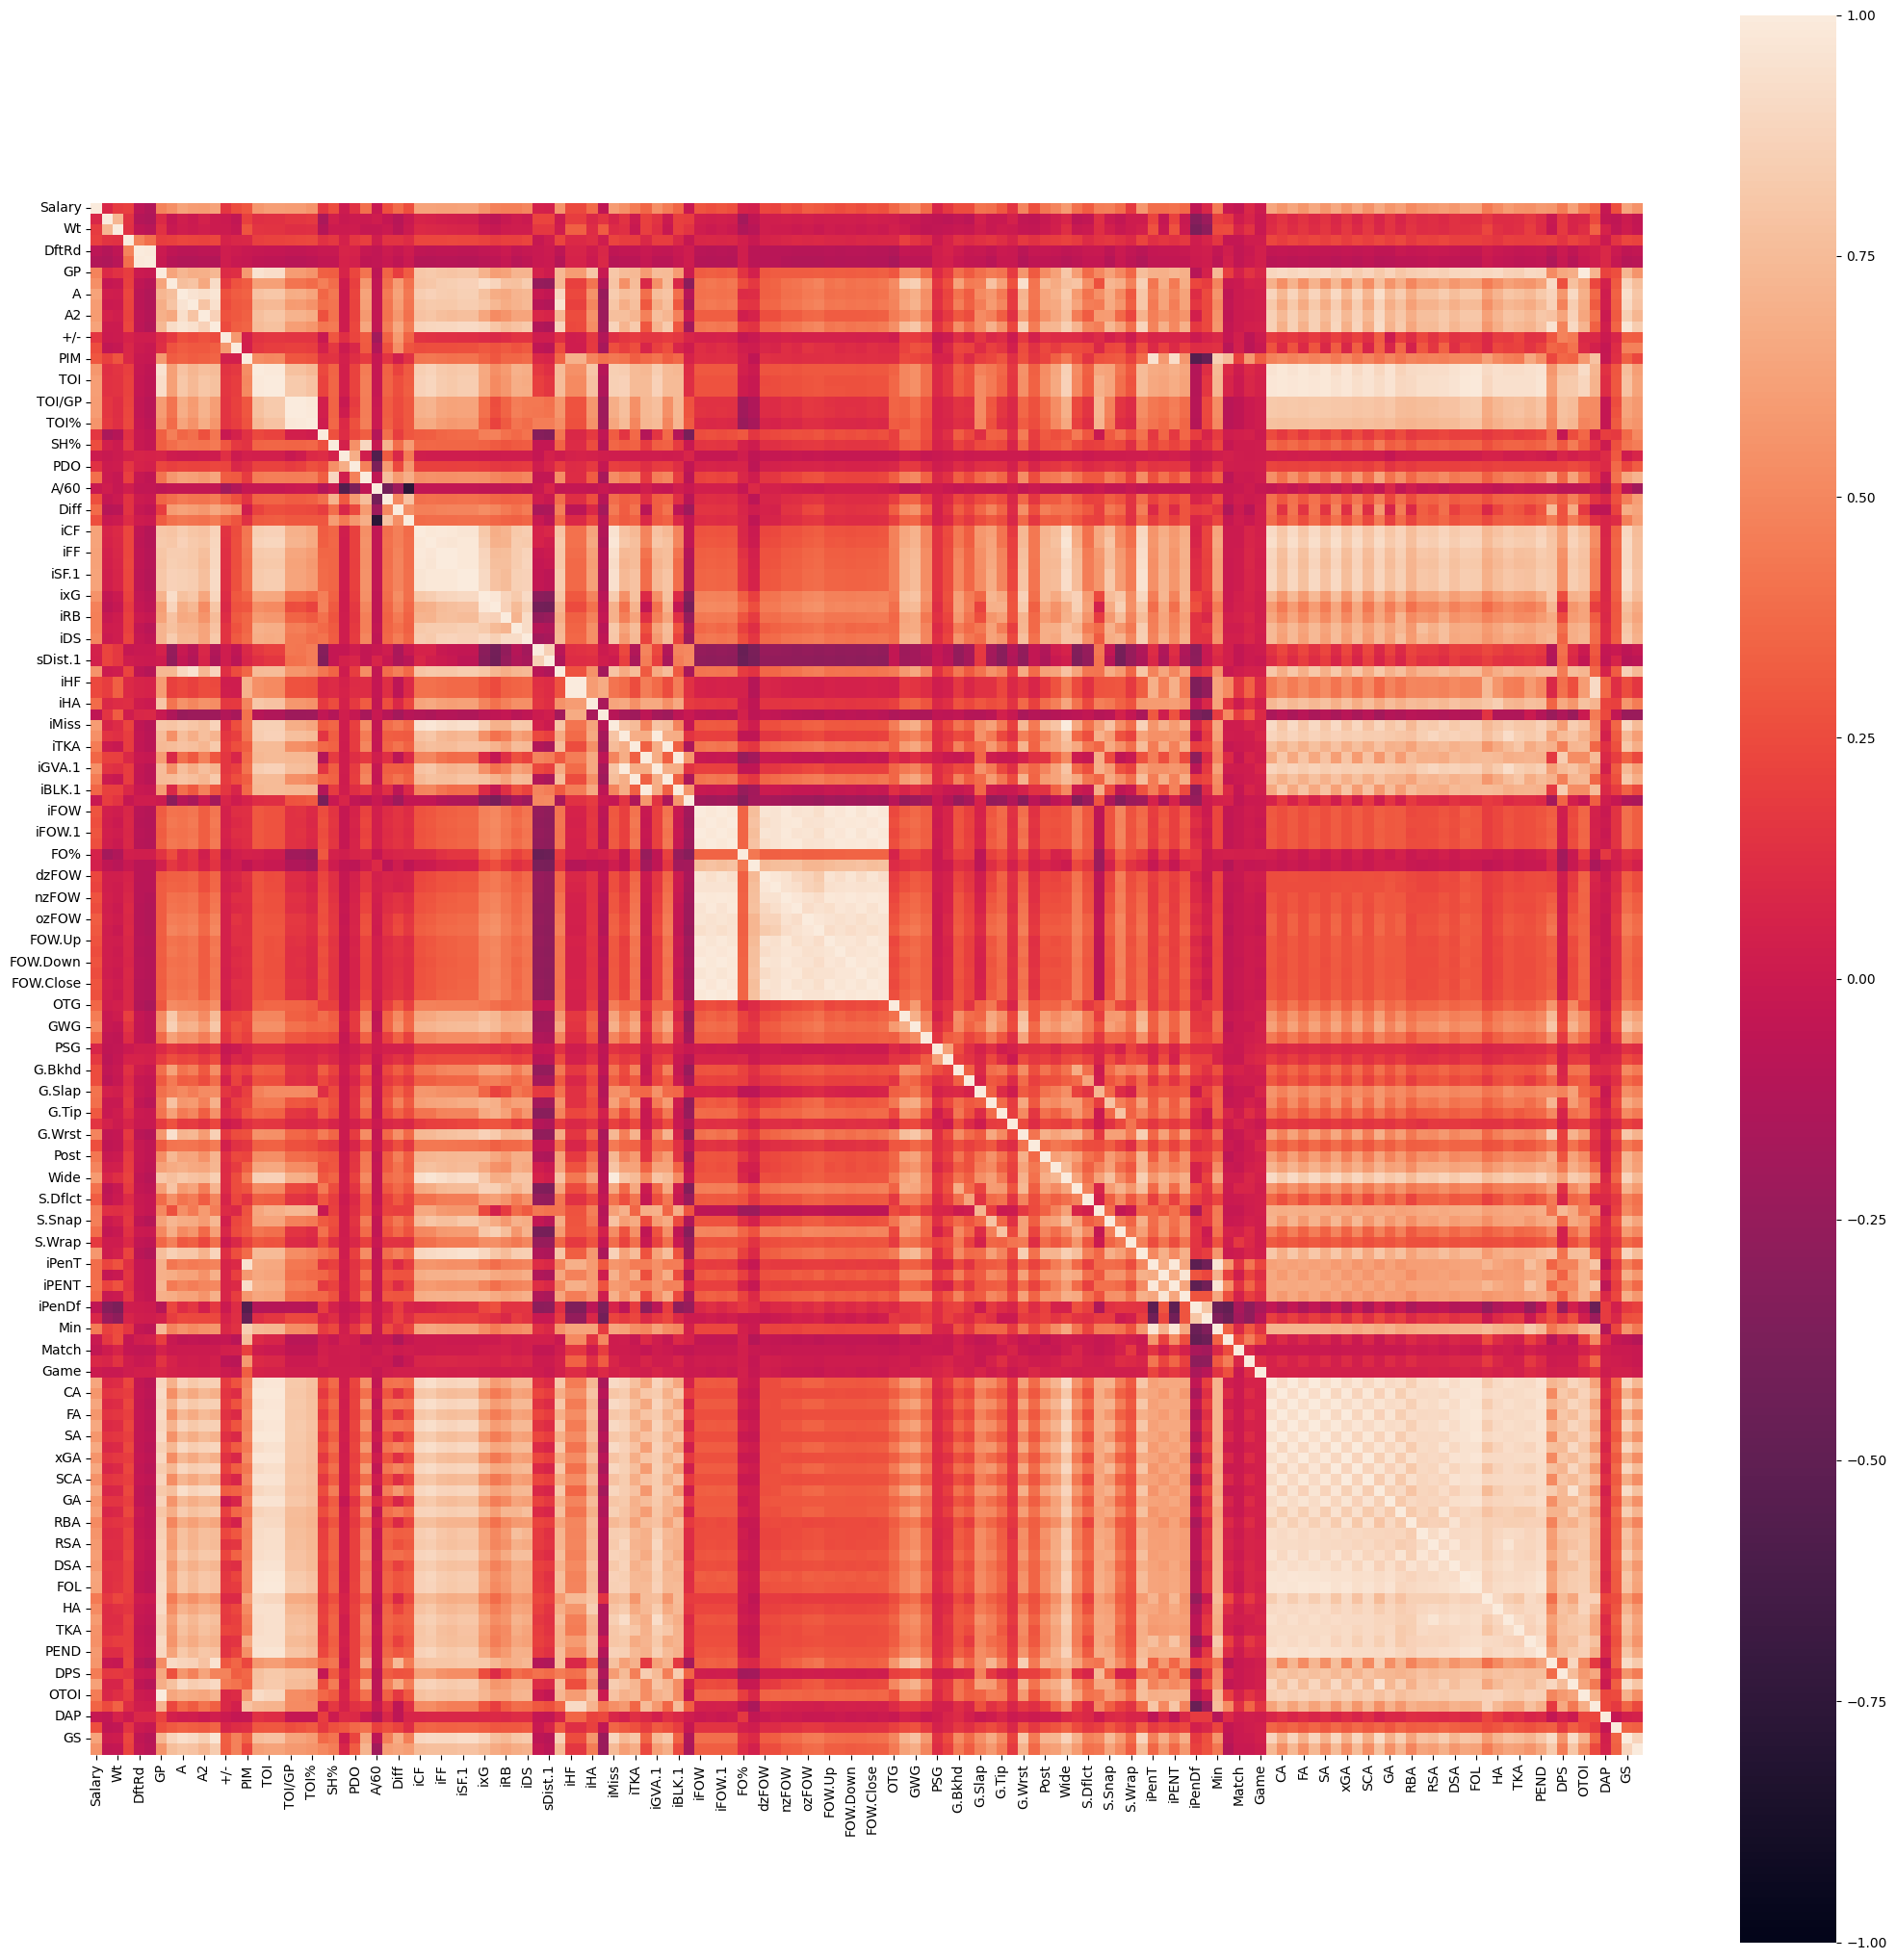

In [ ]:
corr_ = trainDF[num_cols].corr()

fig = plt.figure(figsize=(26, 26))

sns.heatmap(corr_, vmax=1, vmin=-1, square=True)

plt.show()

In [ ]:
corr_

,Salary,Ht,Wt,DftYr,DftRd,Ovrl,GP,G,A,A1,A2,PTS,+/-,E+/-,PIM,Shifts,TOI,TOIX,TOI/GP,TOI/GP.1,TOI%,IPP%,SH%,SV%,PDO,F/60,A/60,Pct%,Diff,Diff/60,iCF,iCF.1,iFF,iSF,iSF.1,iSF.2,ixG,iSCF,iRB,iRS,iDS,sDist,sDist.1,Pass,iHF,iHF.1,iHA,iHDf,iMiss,iGVA,iTKA,iBLK,iGVA.1,iTKA.1,iBLK.1,BLK%,iFOW,iFOL,iFOW.1,iFOL.1,FO%,%FOT,dzFOW,dzFOL,nzFOW,nzFOL,ozFOW,ozFOL,FOW.Up,FOL.Up,FOW.Down,FOL.Down,FOW.Close,FOL.Close,OTG,1G,GWG,ENG,PSG,PSA,G.Bkhd,G.Dflct,G.Slap,G.Snap,G.Tip,G.Wrap,G.Wrst,CBar,Post,Over,Wide,S.Bkhd,S.Dflct,S.Slap,S.Snap,S.Tip,S.Wrap,S.Wrst,iPenT,iPenD,iPENT,iPEND,iPenDf,NPD,Min,Maj,Match,Misc,Game,CF,CA,FF,FA,SF,SA,xGF,xGA,SCF,SCA,GF,GA,RBF,RBA,RSF,RSA,DSF,DSA,FOW,FOL,HF,HA,GVA,TKA,PENT,PEND,OPS,DPS,PS,OTOI,Grit,DAP,Pace,GS,GS/G
Salary,1.000000,0.083907,0.179856,0.197645,-0.076616,-0.117271,0.478480,0.535625,0.627497,0.599064,0.589788,0.626446,0.162146,0.257297,0.293237,0.570642,0.601931,0.602018,0.596312,0.596738,0.559102,0.160999,0.257023,0.002213,0.134893,0.394400,-0.012470,0.263515,0.382540,0.262122,0.627303,0.628985,0.621998,0.622424,0.626006,0.625953,0.550421,0.472836,0.462767,0.461774,0.496136,0.050211,0.040273,0.559841,0.239691,0.239821,0.382340,-0.058217,0.596060,0.544583,0.450249,0.357016,0.545128,0.451562,0.357810,-0.009748,0.281951,0.263090,0.282028,0.263277,0.057326,0.045605,0.228861,0.213962,0.276152,0.252844,0.318647,0.301629,0.277361,0.252469,0.274931,0.255828,0.285713,0.267276,0.355576,0.449480,0.514032,0.380664,0.070785,0.165816,0.255905,0.253514,0.407983,0.395310,0.297552,0.154226,0.485654,0.263821,0.424443,0.491430,0.590085,0.405837,0.316176,0.453883,0.463736,0.385232,0.174938,0.575360,0.389408,0.383130,0.402038,0.370154,-0.061890,0.079944,0.448039,-0.013979,-0.039195,0.086234,0.000087,0.648070,0.563361,0.646797,0.563044,0.651910,0.568665,0.658236,0.558998,0.652969,0.554241,0.659993,0.563789,0.615347,0.515205,0.557328,0.579791,0.601998,0.570649,0.637744,0.626750,0.444515,0.519395,0.591635,0.549110,0.545001,0.580320,0.566716,0.450960,0.621436,0.447698,0.347065,-0.028242,0.263454,0.633554,0.548842
Ht,0.083907,1.000000,0.719970,0.141197,-0.109908,-0.138908,0.098616,-0.035244,0.024310,-0.000595,0.054259,0.000570,-0.005177,-0.050095,0.210790,0.128618,0.133272,0.133528,0.163685,0.162300,0.177787,-0.155973,0.037207,-0.020985,0.002179,-0.001956,0.018122,-0.038396,-0.097880,-0.014390,0.062566,0.058870,0.042844,0.032724,0.029229,0.028956,-0.045604,-0.066666,-0.022040,0.011586,-0.002502,0.226537,0.223958,0.002605,0.193412,0.193552,0.093501,0.150937,0.064431,0.145307,0.006423,0.203650,0.145184,0.005872,0.203872,0.194091,0.032562,0.025765,0.032701,0.025699,-0.185048,-0.054780,0.026347,0.025674,0.035345,0.028574,0.033655,0.020457,0.030423,0.026766,0.031173,0.021640,0.031953,0.027086,0.019481,-0.012200,-0.023168,-0.050574,-0.058110,-0.078031,-0.051171,-0.072675,0.044689,-0.018210,-0.010938,0.051059,-0.050413,-0.060117,-0.019951,0.026294,0.075839,-0.066099,-0.053476,0.127114,-0.004663,-0.041673,0.008818,0.011994,0.219404,-0.033563,0.216867,-0.020743,-0.320889,-0.220441,0.203724,0.165892,0.011808,0.077750,-0.011077,0.099760,0.148624,0.100242,0.148041,0.098203,0.146400,0.082015,0.148239,0.075470,0.150954,0.074868,0.154732,0.075833,0.136936,0.108062,0.123741,0.095953,0.134121,0.118794,0.124230,0.170250,0.114636,0.113337,0.121562,0.164388,0.112972,-0.020534,0.171820,0.068102,0.079781,0.242621,-0.045967,-0.062381,0.000557,-0.044949
Wt,0.179856,0.719970,1.000000,0.137437,-0.062465,-0.091745,0.137339,-0.020688,0.017141,0.005657,0.030601,0.002252,0.005377,-0.027390,0.288261,0.150611,0.144916,0.145518,0.119660,0.119146,0.126745,-0.106328,0.002129,0.006802,0.013958,-0.026628,-0.024784,-0.003117,-0.084596,0.001027,0.098120,0.090074,0.084036,0.070454,0.063304,0.063147,-0.004806,-0.027777,0.009187,0.017866,0.019518,0.169666,0.164104,0.016805,0.331095,0.331228,0.109707,0.316414,0.107703,0.125191,-0.020529,0.200568,0.125033,-0.020723,0.200870,0.148829,0.015805,-0.000196,0.015951,-0.000280,-0.129416,-0.091573,0.024709,0.015411,0.009160,-0.0051

In [ ]:
for col in trainDF.columns:
  plt.figure()
  plt.hist(trainDF[col], bins=10, edgecolor='k')
  plt.title(f"Histogram plot for {col}")
  plt.xlabel(col)
  plt.ylabel("Frequency")

Output hidden; open in https://colab.research.google.com to view.

count        612.00
mean     2264508.78
std      2236340.01
min       575000.00
25%       742500.00
50%       925000.00
75%      3500000.00
max     13800000.00
Name: Salary, dtype: float64


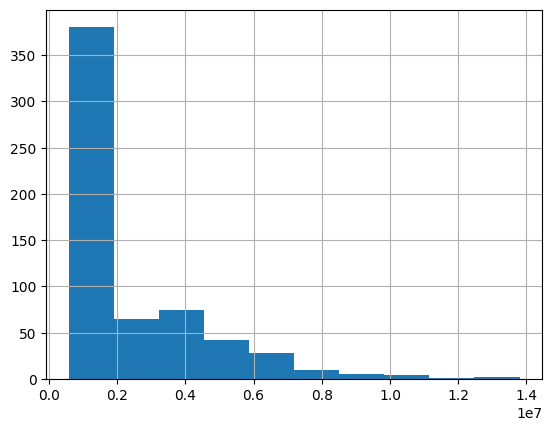

In [ ]:
pd.options.display.float_format = '{:.2f}'.format

print(trainDF.Salary.describe())

trainDF.Salary.hist()

plt.show()

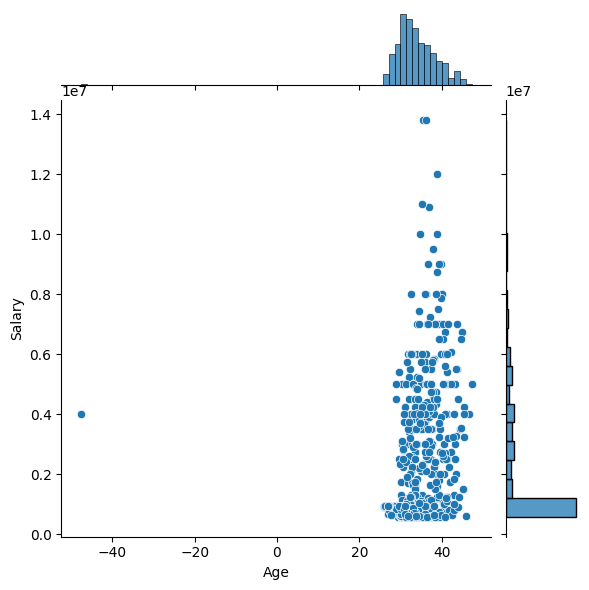

In [ ]:
sns.jointplot(x=trainDF.Age, y=trainDF.Salary, kind='scatter')

plt.show()

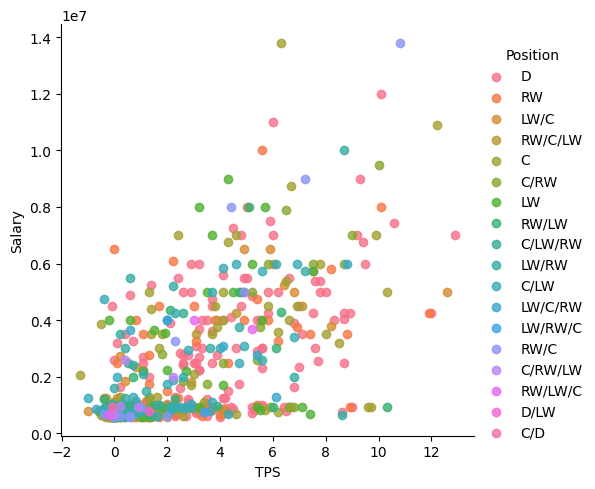

In [ ]:
sns.lmplot(x='TPS', y='Salary', data=trainDF, fit_reg=False, hue='Position')

plt.show()

<ipython-input-34-ff5e5316a1c4>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(trainDF.Age)


<Axes: xlabel='Age', ylabel='Density'>

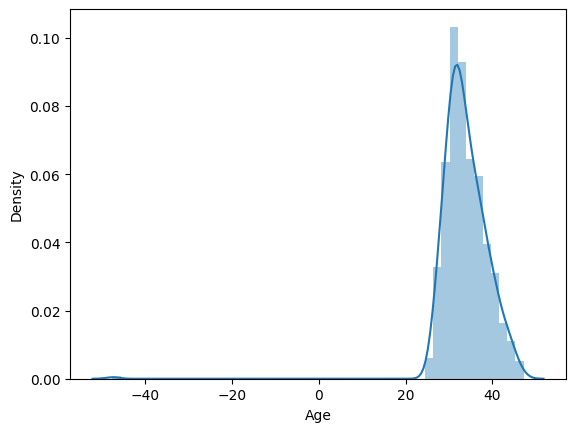

In [ ]:
sns.distplot(trainDF.Age)

<ipython-input-35-f9f1850b0d08>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(trainDF.Salary)


<Axes: xlabel='Salary', ylabel='Density'>

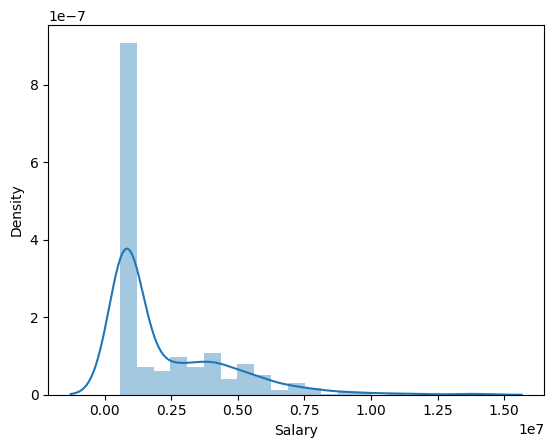

In [ ]:
sns.distplot(trainDF.Salary)

<ipython-input-36-d6ce841fcfac>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=trainDF.Cntry.value_counts().index,


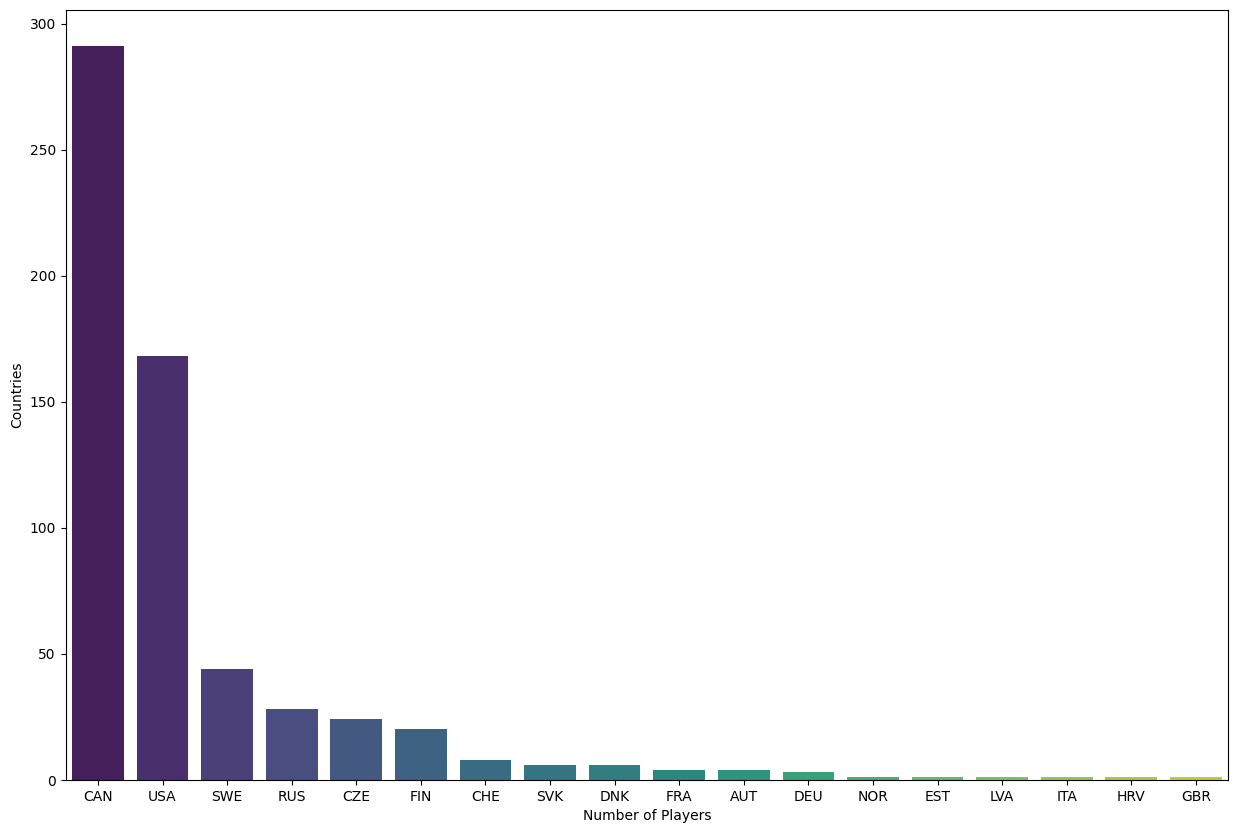

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))

sns.barplot(x=trainDF.Cntry.value_counts().index,
            y=trainDF.Cntry.value_counts().values, palette='viridis')

ax.set(xlabel='Number of Players',
       ylabel='Countries')

plt.show()

In [ ]:
trainDF.head()

,Salary,Born,City,Pr/St,Cntry,Nat,Ht,Wt,DftYr,DftRd,Ovrl,Hand,Last Name,First Name,Position,Team,GP,G,A,A1,A2,PTS,+/-,E+/-,PIM,Shifts,TOI,TOIX,TOI/GP,TOI/GP.1,TOI%,IPP%,SH%,SV%,PDO,F/60,A/60,Pct%,Diff,Diff/60,iCF,iCF.1,iFF,iSF,iSF.1,iSF.2,ixG,iSCF,iRB,iRS,iDS,sDist,sDist.1,Pass,iHF,iHF.1,iHA,iHDf,iMiss,iGVA,iTKA,iBLK,iGVA.1,iTKA.1,iBLK.1,BLK%,iFOW,iFOL,iFOW.1,iFOL.1,FO%,%FOT,dzFOW,dzFOL,nzFOW,nzFOL,ozFOW,ozFOL,FOW.Up,FOL.Up,FOW.Down,FOL.Down,FOW.Close,FOL.Close,OTG,1G,GWG,ENG,PSG,PSA,G.Bkhd,G.Dflct,G.Slap,G.Snap,G.Tip,G.Wrap,G.Wrst,CBar,Post,Over,Wide,S.Bkhd,S.Dflct,S.Slap,S.Snap,S.Tip,S.Wrap,S.Wrst,iPenT,iPenD,iPENT,iPEND,iPenDf,NPD,Min,Maj,Match,Misc,Game,CF,CA,FF,FA,SF,SA,xGF,xGA,SCF,SCA,GF,GA,RBF,RBA,RSF,RSA,DSF,DSA,FOW,FOL,HF,HA,GVA,TKA,PENT,PEND,OPS,DPS,PS,OTOI,Grit,DAP,Pace,GS,GS/G,Age,TPS
0,925000,1997-01-30,Sainte-Marie,QC,CAN,CAN,74,190,2015.00,1.00,18.00,L,Chabot,Thomas,D,OTT,1,0,0,0,0,0,-2,0.00,0,13,429,7.20,7.15,7.16,15.20,0.00,0.00,0.75,750.00,0.00,16.74,0.00,-2,-16.74,2.00,2,2.00,1.00,1,1,0.00,0.00,0.00,0.00,0.00,43.00,49.30,0.00,1,1.00,0.00,1.00,1,1,0,0,1.00,0.00,0.00,0.00,0,0,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0.00,0.00,0,0.00,0,0,0,0,0,9.00,12.00,8.00,10.00,5.00,8.00,0.50,0.90,2.00,3.00,0.00,2.00,1.00,1.00,0.00,1.00,1,2,4.00,5.00,1.00,2.00,1.00,1.00,1.00,1.00,0.00,-0.20,-0.20,40.03,1,0.00,175.70,-0.40,-0.38,27.40,-0.20
1,2250000,1993-12-21,Ottawa,ON,CAN,CAN,74,207,2012.00,1.00,15.00,R,Ceci,Cody,D,OTT,79,2,15,6,9,17,-11,-10.40,20,2418,109992,1826.20,23.20,23.17,39.00,30.40,7.40,0.92,989.00,1.84,2.79,39.70,-29,-0.95,287.00,287,197.00,143.00,143,143,6.10,7.00,7.00,9.00,16.00,52.40,46.30,138.10,111,111.00,154.00,-43.00,54,74,22,159,74.00,22.00,159.00,8.00,1,0,1.00,0.00,100.00,0.10,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,2,51,2,0,49,12,0,1,79,10,6,10.00,5.00,-4,2.20,10,0,0,0,0,1433.00,1992.00,1038.00,1423.00,757.00,997.00,62.00,88.80,197.00,280.00,56.00,85.00,68.00,82.00,79.00,94.00,147,176,949.00,939.00,749.00,671.00,284.00,197.00,104.00,98.00,-0.20,3.40,3.20,2850.59,290,13.30,112.50,14.10,0.18,30.51,3.20
2,8000000,1988-04-16,St. Paul,MN,USA,USA,72,218,2006.00,1.00,7.00,R,Okposo,Kyle,RW,BUF,65,19,26,13,13,45,-7,-1.40,24,1443,73983,1229.20,18.97,18.95,33.10,63.40,9.70,0.93,1031.00,3.47,1.95,64.00,31,1.51,283.00,283,212.00,155.00,156,156,17.40,64.00,16.00,20.00,36.00,28.40,26.30,196.80,53,53.00,68.00,-15.00,57,36,26,25,36.00,26.00,25.00,2.40,54,45,54.00,45.00,54.50,7.40,9,6,10,11,35,28,13,10,21,16,37,33,1,5,2,0,0,0,5,2,0,3,0,0,9,0,2,4,51,19,3,3,20,8,2,101,12,10,11.00,8.00,-2,-0.50,12,0,0,0,0,1301.00,1051.00,986.00,826.00,734.00,606.00,70.80,46.40,235.00,133.00,71.00,40.00,60.00,34.00,76.00,52.00,136,86,739.00,600.00,340.00,351.00,168.00,129.00,56.00,70.00,3.70,1.30,5.00,2486.75,102,6.60,114.80,36.80,0.57,36.19,5.00
3,3500000,1992-01-07,Ottawa,ON,CAN,CAN,77,220,2010.00,1.00,3.00,R,Gudbranson,Erik,D,VAN,30,1,5,5,0,6,-14,-5.30,18,765,36603,607.90,20.33,20.31,36.10,37.50,6.20,0.90,959.00,1.58,3.45,31.40,-19,-1.88,88.00,88,55.00,40.00,40,40,1.40,2.00,1.00,4.00,5.00,55.10,51.00,153.00,66,66.00,66.00,0.00,15,23,4,44,23.00,4.00,44.00,7.30,0,0,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,15,0,0,18,3,0,0,19,6,7,6.00,6.00,1,2.70,4,2,0,0,0,460.00,605.00,339.00,467.00,259.00,340.00,22.00,33.60,80.00,130.00,16.00,35.00,27.00,20.00,29.00,32.00,56,52,324.00,328.00,198.00,197.00,86.00,59.00,26.00,22.00,0.00,0.40,0.50,1074.41,130,17.50,105.10,5.90,0.20,32.46,0.40
4,1750000,1994-03-29,Toronto,ON,CAN,CAN,76,217,2012.00,1.00,16.00,R,Wilson,Tom,RW,WSH,82,7,12,4,8,19,9,4.10,133,1453,63592,1059.70,12.93,12.93,23.50,61.30,7.80,0.92,995.00,1.76,2.32,43.10,-10,-0.57,166.00,166,118.00,95.00,95,95,9.30,35.00,8.00,10.00,18.00,30.90,26.40,96.30,239,239.00,134.00,105.00,23,21,36,44,21.00,36.00,44.00,4.40,3,7,3.00,7.00,30.00,1.00,1,1,0,2,2,4,3,1,0,3,2,6,0,2,0,1,0,0,0,0,0,0,1,0,6,0,2,1,20,7,2,3,10,11,1,61,44,33,40.00,29.00,-11,-14.30,33,9,0,1,1

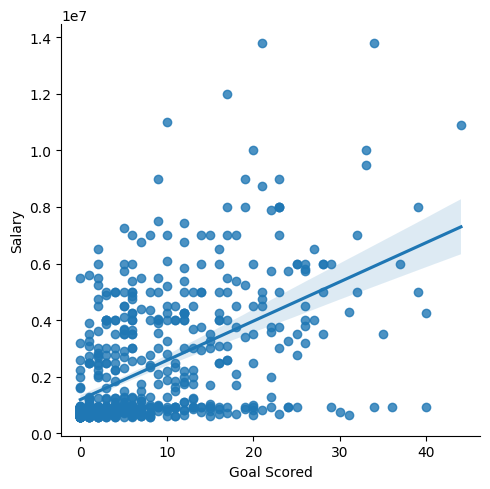

In [ ]:
sns.lmplot(x='G', y='Salary', data=trainDF, fit_reg=True)

plt.xlabel("Goal Scored")
plt.ylabel("Salary")

plt.show()

In [ ]:
import plotly.express as plx

fig3D = plx.scatter_3d(trainDF, x='G', y='Age', z='Salary', color='Position', symbol='Position')

fig3D.show()

## Dealing With Outliers

In [ ]:
trainDF.head()

,Salary,Born,City,Pr/St,Cntry,Nat,Ht,Wt,DftYr,DftRd,Ovrl,Hand,Last Name,First Name,Position,Team,GP,G,A,A1,A2,PTS,+/-,E+/-,PIM,Shifts,TOI,TOIX,TOI/GP,TOI/GP.1,TOI%,IPP%,SH%,SV%,PDO,F/60,A/60,Pct%,Diff,Diff/60,iCF,iCF.1,iFF,iSF,iSF.1,iSF.2,ixG,iSCF,iRB,iRS,iDS,sDist,sDist.1,Pass,iHF,iHF.1,iHA,iHDf,iMiss,iGVA,iTKA,iBLK,iGVA.1,iTKA.1,iBLK.1,BLK%,iFOW,iFOL,iFOW.1,iFOL.1,FO%,%FOT,dzFOW,dzFOL,nzFOW,nzFOL,ozFOW,ozFOL,FOW.Up,FOL.Up,FOW.Down,FOL.Down,FOW.Close,FOL.Close,OTG,1G,GWG,ENG,PSG,PSA,G.Bkhd,G.Dflct,G.Slap,G.Snap,G.Tip,G.Wrap,G.Wrst,CBar,Post,Over,Wide,S.Bkhd,S.Dflct,S.Slap,S.Snap,S.Tip,S.Wrap,S.Wrst,iPenT,iPenD,iPENT,iPEND,iPenDf,NPD,Min,Maj,Match,Misc,Game,CF,CA,FF,FA,SF,SA,xGF,xGA,SCF,SCA,GF,GA,RBF,RBA,RSF,RSA,DSF,DSA,FOW,FOL,HF,HA,GVA,TKA,PENT,PEND,OPS,DPS,PS,OTOI,Grit,DAP,Pace,GS,GS/G,Age,TPS
0,925000,1997-01-30,Sainte-Marie,QC,CAN,CAN,74,190,2015.00,1.00,18.00,L,Chabot,Thomas,D,OTT,1,0,0,0,0,0,-2,0.00,0,13,429,7.20,7.15,7.16,15.20,0.00,0.00,0.75,750.00,0.00,16.74,0.00,-2,-16.74,2.00,2,2.00,1.00,1,1,0.00,0.00,0.00,0.00,0.00,43.00,49.30,0.00,1,1.00,0.00,1.00,1,1,0,0,1.00,0.00,0.00,0.00,0,0,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0.00,0.00,0,0.00,0,0,0,0,0,9.00,12.00,8.00,10.00,5.00,8.00,0.50,0.90,2.00,3.00,0.00,2.00,1.00,1.00,0.00,1.00,1,2,4.00,5.00,1.00,2.00,1.00,1.00,1.00,1.00,0.00,-0.20,-0.20,40.03,1,0.00,175.70,-0.40,-0.38,27.40,-0.20
1,2250000,1993-12-21,Ottawa,ON,CAN,CAN,74,207,2012.00,1.00,15.00,R,Ceci,Cody,D,OTT,79,2,15,6,9,17,-11,-10.40,20,2418,109992,1826.20,23.20,23.17,39.00,30.40,7.40,0.92,989.00,1.84,2.79,39.70,-29,-0.95,287.00,287,197.00,143.00,143,143,6.10,7.00,7.00,9.00,16.00,52.40,46.30,138.10,111,111.00,154.00,-43.00,54,74,22,159,74.00,22.00,159.00,8.00,1,0,1.00,0.00,100.00,0.10,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,2,51,2,0,49,12,0,1,79,10,6,10.00,5.00,-4,2.20,10,0,0,0,0,1433.00,1992.00,1038.00,1423.00,757.00,997.00,62.00,88.80,197.00,280.00,56.00,85.00,68.00,82.00,79.00,94.00,147,176,949.00,939.00,749.00,671.00,284.00,197.00,104.00,98.00,-0.20,3.40,3.20,2850.59,290,13.30,112.50,14.10,0.18,30.51,3.20
2,8000000,1988-04-16,St. Paul,MN,USA,USA,72,218,2006.00,1.00,7.00,R,Okposo,Kyle,RW,BUF,65,19,26,13,13,45,-7,-1.40,24,1443,73983,1229.20,18.97,18.95,33.10,63.40,9.70,0.93,1031.00,3.47,1.95,64.00,31,1.51,283.00,283,212.00,155.00,156,156,17.40,64.00,16.00,20.00,36.00,28.40,26.30,196.80,53,53.00,68.00,-15.00,57,36,26,25,36.00,26.00,25.00,2.40,54,45,54.00,45.00,54.50,7.40,9,6,10,11,35,28,13,10,21,16,37,33,1,5,2,0,0,0,5,2,0,3,0,0,9,0,2,4,51,19,3,3,20,8,2,101,12,10,11.00,8.00,-2,-0.50,12,0,0,0,0,1301.00,1051.00,986.00,826.00,734.00,606.00,70.80,46.40,235.00,133.00,71.00,40.00,60.00,34.00,76.00,52.00,136,86,739.00,600.00,340.00,351.00,168.00,129.00,56.00,70.00,3.70,1.30,5.00,2486.75,102,6.60,114.80,36.80,0.57,36.19,5.00
3,3500000,1992-01-07,Ottawa,ON,CAN,CAN,77,220,2010.00,1.00,3.00,R,Gudbranson,Erik,D,VAN,30,1,5,5,0,6,-14,-5.30,18,765,36603,607.90,20.33,20.31,36.10,37.50,6.20,0.90,959.00,1.58,3.45,31.40,-19,-1.88,88.00,88,55.00,40.00,40,40,1.40,2.00,1.00,4.00,5.00,55.10,51.00,153.00,66,66.00,66.00,0.00,15,23,4,44,23.00,4.00,44.00,7.30,0,0,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,15,0,0,18,3,0,0,19,6,7,6.00,6.00,1,2.70,4,2,0,0,0,460.00,605.00,339.00,467.00,259.00,340.00,22.00,33.60,80.00,130.00,16.00,35.00,27.00,20.00,29.00,32.00,56,52,324.00,328.00,198.00,197.00,86.00,59.00,26.00,22.00,0.00,0.40,0.50,1074.41,130,17.50,105.10,5.90,0.20,32.46,0.40
4,1750000,1994-03-29,Toronto,ON,CAN,CAN,76,217,2012.00,1.00,16.00,R,Wilson,Tom,RW,WSH,82,7,12,4,8,19,9,4.10,133,1453,63592,1059.70,12.93,12.93,23.50,61.30,7.80,0.92,995.00,1.76,2.32,43.10,-10,-0.57,166.00,166,118.00,95.00,95,95,9.30,35.00,8.00,10.00,18.00,30.90,26.40,96.30,239,239.00,134.00,105.00,23,21,36,44,21.00,36.00,44.00,4.40,3,7,3.00,7.00,30.00,1.00,1,1,0,2,2,4,3,1,0,3,2,6,0,2,0,1,0,0,0,0,0,0,1,0,6,0,2,1,20,7,2,3,10,11,1,61,44,33,40.00,29.00,-11,-14.30,33,9,0,1,1

In [ ]:
def plot_boxplot(df, columns):
    """
    Plots boxplots for specified columns of a DataFrame using seaborn.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the data to plot.
    columns (list): List of column names (strings) to plot boxplots for.

    Returns:
    None
    """
    # Check if the list of columns is empty
    if len(columns) == 0:
        return

    # Iterate over each column in the list
    for col in columns:
        # Create a new figure for each boxplot
        fig = plt.figure()

        # Plot a boxplot for the current column using seaborn
        sns.boxplot(df[col], palette="Set1")

        # Set title and labels for the plot
        plt.title(f"Boxplot for {col}")
        plt.xlabel(col)

        # Display the plot
        plt.show()

In [ ]:
plot_boxplot(trainDF, num_cols)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
def detect_outliers(df, cols):
    """
    Detects outliers in specified columns of a DataFrame using the IQR method.

    Parameters:
    df (pd.DataFrame): The DataFrame to analyze.
    cols (list): List of column names (strings) to detect outliers for.

    Returns:
    None
    """
    # Check if the list of columns is empty
    if len(cols) == 0:
        return

    # Iterate over each column in the list
    for col in cols:
        # Calculate quartiles and IQR
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        # Calculate lower and upper bounds for outliers
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        # Find outliers using the bounds
        outliers = df[(df[col] < lower) | (df[col] > upper)]

        # Print information about outliers
        print(f"-"*70)
        print(f"Outliers for {col}  :  ")
        print(f"-"*70)
        print('The upper and lower bounds for suspected outliers are {} and {}\n'.format(lower, upper))
        print(f"-"*70)
        # print(outliers)
        # return outliers

In [ ]:
detect_outliers(trainDF, num_cols)

----------------------------------------------------------------------
Outliers for Salary  :  
----------------------------------------------------------------------
The upper and lower bounds for suspected outliers are -3393750.0 and 7636250.0

----------------------------------------------------------------------
----------------------------------------------------------------------
Outliers for Ht  :  
----------------------------------------------------------------------
The upper and lower bounds for suspected outliers are 69.0 and 77.0

----------------------------------------------------------------------
----------------------------------------------------------------------
Outliers for Wt  :  
----------------------------------------------------------------------
The upper and lower bounds for suspected outliers are 160.0 and 240.0

----------------------------------------------------------------------
----------------------------------------------------------------------
Out

In [ ]:
salary_desc = trainDF.Salary.describe()
print(salary_desc)

Q1 = salary_desc['25%']
Q3 = salary_desc['75%']

IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers = trainDF[trainDF.Salary > upper].index.tolist()
trainDF[trainDF.Salary > upper]


count        612.00
mean     2264508.78
std      2236340.01
min       575000.00
25%       742500.00
50%       925000.00
75%      3500000.00
max     13800000.00
Name: Salary, dtype: float64


,Salary,Born,City,Pr/St,Cntry,Nat,Ht,Wt,DftYr,DftRd,Ovrl,Hand,Last Name,First Name,Position,Team,GP,G,A,A1,A2,PTS,+/-,E+/-,PIM,Shifts,TOI,TOIX,TOI/GP,TOI/GP.1,TOI%,IPP%,SH%,SV%,PDO,F/60,A/60,Pct%,Diff,Diff/60,iCF,iCF.1,iFF,iSF,iSF.1,iSF.2,ixG,iSCF,iRB,iRS,iDS,sDist,sDist.1,Pass,iHF,iHF.1,iHA,iHDf,iMiss,iGVA,iTKA,iBLK,iGVA.1,iTKA.1,iBLK.1,BLK%,iFOW,iFOL,iFOW.1,iFOL.1,FO%,%FOT,dzFOW,dzFOL,nzFOW,nzFOL,ozFOW,ozFOL,FOW.Up,FOL.Up,FOW.Down,FOL.Down,FOW.Close,FOL.Close,OTG,1G,GWG,ENG,PSG,PSA,G.Bkhd,G.Dflct,G.Slap,G.Snap,G.Tip,G.Wrap,G.Wrst,CBar,Post,Over,Wide,S.Bkhd,S.Dflct,S.Slap,S.Snap,S.Tip,S.Wrap,S.Wrst,iPenT,iPenD,iPENT,iPEND,iPenDf,NPD,Min,Maj,Match,Misc,Game,CF,CA,FF,FA,SF,SA,xGF,xGA,SCF,SCA,GF,GA,RBF,RBA,RSF,RSA,DSF,DSA,FOW,FOL,HF,HA,GVA,TKA,PENT,PEND,OPS,DPS,PS,OTOI,Grit,DAP,Pace,GS,GS/G,Age,TPS
2,8000000,1988-04-16,St. Paul,MN,USA,USA,72,218,2006.00,1.00,7.00,R,Okposo,Kyle,RW,BUF,65,19,26,13,13,45,-7,-1.40,24,1443,73983,1229.20,18.97,18.95,33.10,63.40,9.70,0.93,1031.00,3.47,1.95,64.00,31,1.51,283.00,283,212.00,155.00,156,156,17.40,64.00,16.00,20.00,36.00,28.40,26.30,196.80,53,53.00,68.00,-15.00,57,36,26,25,36.00,26.00,25.00,2.40,54,45,54.00,45.00,54.50,7.40,9,6,10,11,35,28,13,10,21,16,37,33,1,5,2,0,0,0,5,2,0,3,0,0,9,0,2,4,51,19,3,3,20,8,2,101,12,10,11.00,8.00,-2,-0.50,12,0,0,0,0,1301.00,1051.00,986.00,826.00,734.00,606.00,70.80,46.40,235.00,133.00,71.00,40.00,60.00,34.00,76.00,52.00,136,86,739.00,600.00,340.00,351.00,168.00,129.00,56.00,70.00,3.70,1.30,5.00,2486.75,102,6.60,114.80,36.80,0.57,36.19,5.00
103,13800000,1988-11-19,Buffalo,NY,USA,USA,71,177,2007.00,1.00,1.00,L,Kane,Patrick,RW/C,CHI,82,34,55,36,19,89,11,-6.50,32,1910,105263,1742.90,21.40,21.35,36.30,78.10,11.20,0.92,1030.00,3.92,2.31,63.00,47,1.62,491.00,491,382.00,292.00,292,292,23.10,68.00,7.00,21.00,28.00,27.70,26.40,469.50,28,28.00,130.00,-102.00,90,42,49,15,42.00,49.00,15.00,1.10,7,44,7.00,44.00,13.70,3.30,0,0,0,3,7,41,1,14,2,16,4,30,1,12,5,3,0,0,4,0,2,6,1,1,20,1,8,18,63,41,2,26,32,6,3,182,16,21,16.00,19.00,5,3.30,16,0,0,0,0,1916.00,1394.00,1389.00,1070.00,1020.00,817.00,91.50,69.20,292.00,237.00,114.00,67.00,46.00,65.00,61.00,96.00,107,161,742.00,816.00,260.00,610.00,283.00,211.00,69.00,91.00,8.70,2.10,10.80,3057.71,75,4.80,114.00,89.20,1.09,35.59,10.80
145,10900000,1987-08-07,Cole Harbour,NS,CAN,CAN,71,200,2005.00,1.00,1.00,L,Crosby,Sidney,C,PIT,75,44,45,28,17,89,17,18.40,24,1852,89450,1489.60,19.88,19.87,34.10,74.20,11.40,0.92,1031.00,4.83,2.38,67.00,61,2.46,411.00,411,325.00,255.00,255,255,29.80,113.00,34.00,22.00,56.00,23.70,22.90,404.20,80,80.00,91.00,-11.00,70,70,39,27,70.00,39.00,27.00,2.10,842,906,842.00,906.00,48.20,98.50,157,190,293,326,392,390,256,275,253,302,546,549,1,11,5,2,0,0,5,2,2,10,6,1,18,1,4,10,55,39,5,23,45,19,3,121,12,19,12.00,19.00,7,6.20,12,0,0,0,0,1841.00,1272.00,1393.00,959.00,1056.00,715.00,111.10,65.90,419.00,231.00,120.00,59.00,106.00,58.00,60.00,64.00,166,122,857.00,917.00,482.00,651.00,223.00,160.00,82.00,110.00,10.50,1.70,12.30,2880.93,131,9.90,125.40,94.60,1.26,36.88,12.20
148,8000000,1991-12-13,Yaroslavl,ON,RUS,RUS,72,219,2010.00,1.00,16.00,L,Tarasenko,Vladimir,RW,STL,82,39,36,18,18,75,-1,4.10,12,2064,90872,1508.70,18.47,18.45,31.80,77.30,11.00,0.91,1024.00,3.86,2.19,63.80,42,1.67,526.00,525,398.00,286.00,286,286,25.40,82.00,14.00,14.00,28.00,29.30,27.40,309.90,50,50.00,94.00,-44.00,112,31,29,31,31.00,29.00,31.00,2.60,5,5,5.00,5.00,50.00,0.60,0,0,2,1,3,4,1,1,0,3,4,4,3,7,8,2,0,0,2,0,1,5,1,0,30,3,9,10,90,12,2,11,42,5,0,214,6,19,5.00,17.00,13,13.00,6,0,0,0,0,1606.00,1190.00,1198.00,866.00,879.00,635.00,80.20,52.80,271.00,174.00,97.00,55.00,55.00,40.00,54.00,54.00,109,94,783.00,791.00,358.00,493.00,165.00,144.00,73.00,83.00,8.40,1.70,10.20,3229.59,93,13.20,111.20,84.30,1.03,32.53,10.10
156,8000000,1984-06-16,Brampton,ON,CAN,CAN,76,212,2002.00,1.00,1.00,L,Nash,Rick,RW/LW,NYR,67,23,15,13,2,38,9,0.40,26,1656,66186,1101.70,16.47,16.46,27.50,63.30,11.00,0.92,1029.00,3.27,2.51,56.60,14,0.76,319.00,319,265.00,195.00,195,195,22.40,84.00,1

In [ ]:
print(f"Shape before removing Outliers  :  {trainDF.shape}")

Shape before removing Outliers  :  (612, 156)


In [ ]:
# Removing Outliers
for index in outliers:
  trainDF.drop(index, inplace=True)

In [ ]:
print(f"Shape after removing Outliers  :  {trainDF.shape}")

Shape after removing Outliers  :  (593, 156)


In [ ]:
# Removing Unuseful cols
del(trainDF['Born'])
del(trainDF['First Name'])
del(trainDF['Last Name'])

In [ ]:
print(f"Shape after removing 3 Cols  :  {trainDF.shape}")

Shape after removing 3 Cols  :  (593, 153)


In [ ]:
trainDF.head()

,Salary,City,Pr/St,Cntry,Nat,Ht,Wt,DftYr,DftRd,Ovrl,Hand,Position,Team,GP,G,A,A1,A2,PTS,+/-,E+/-,PIM,Shifts,TOI,TOIX,TOI/GP,TOI/GP.1,TOI%,IPP%,SH%,SV%,PDO,F/60,A/60,Pct%,Diff,Diff/60,iCF,iCF.1,iFF,iSF,iSF.1,iSF.2,ixG,iSCF,iRB,iRS,iDS,sDist,sDist.1,Pass,iHF,iHF.1,iHA,iHDf,iMiss,iGVA,iTKA,iBLK,iGVA.1,iTKA.1,iBLK.1,BLK%,iFOW,iFOL,iFOW.1,iFOL.1,FO%,%FOT,dzFOW,dzFOL,nzFOW,nzFOL,ozFOW,ozFOL,FOW.Up,FOL.Up,FOW.Down,FOL.Down,FOW.Close,FOL.Close,OTG,1G,GWG,ENG,PSG,PSA,G.Bkhd,G.Dflct,G.Slap,G.Snap,G.Tip,G.Wrap,G.Wrst,CBar,Post,Over,Wide,S.Bkhd,S.Dflct,S.Slap,S.Snap,S.Tip,S.Wrap,S.Wrst,iPenT,iPenD,iPENT,iPEND,iPenDf,NPD,Min,Maj,Match,Misc,Game,CF,CA,FF,FA,SF,SA,xGF,xGA,SCF,SCA,GF,GA,RBF,RBA,RSF,RSA,DSF,DSA,FOW,FOL,HF,HA,GVA,TKA,PENT,PEND,OPS,DPS,PS,OTOI,Grit,DAP,Pace,GS,GS/G,Age,TPS
0,925000,Sainte-Marie,QC,CAN,CAN,74,190,2015.00,1.00,18.00,L,D,OTT,1,0,0,0,0,0,-2,0.00,0,13,429,7.20,7.15,7.16,15.20,0.00,0.00,0.75,750.00,0.00,16.74,0.00,-2,-16.74,2.00,2,2.00,1.00,1,1,0.00,0.00,0.00,0.00,0.00,43.00,49.30,0.00,1,1.00,0.00,1.00,1,1,0,0,1.00,0.00,0.00,0.00,0,0,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0.00,0.00,0,0.00,0,0,0,0,0,9.00,12.00,8.00,10.00,5.00,8.00,0.50,0.90,2.00,3.00,0.00,2.00,1.00,1.00,0.00,1.00,1,2,4.00,5.00,1.00,2.00,1.00,1.00,1.00,1.00,0.00,-0.20,-0.20,40.03,1,0.00,175.70,-0.40,-0.38,27.40,-0.20
1,2250000,Ottawa,ON,CAN,CAN,74,207,2012.00,1.00,15.00,R,D,OTT,79,2,15,6,9,17,-11,-10.40,20,2418,109992,1826.20,23.20,23.17,39.00,30.40,7.40,0.92,989.00,1.84,2.79,39.70,-29,-0.95,287.00,287,197.00,143.00,143,143,6.10,7.00,7.00,9.00,16.00,52.40,46.30,138.10,111,111.00,154.00,-43.00,54,74,22,159,74.00,22.00,159.00,8.00,1,0,1.00,0.00,100.00,0.10,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,2,51,2,0,49,12,0,1,79,10,6,10.00,5.00,-4,2.20,10,0,0,0,0,1433.00,1992.00,1038.00,1423.00,757.00,997.00,62.00,88.80,197.00,280.00,56.00,85.00,68.00,82.00,79.00,94.00,147,176,949.00,939.00,749.00,671.00,284.00,197.00,104.00,98.00,-0.20,3.40,3.20,2850.59,290,13.30,112.50,14.10,0.18,30.51,3.20
3,3500000,Ottawa,ON,CAN,CAN,77,220,2010.00,1.00,3.00,R,D,VAN,30,1,5,5,0,6,-14,-5.30,18,765,36603,607.90,20.33,20.31,36.10,37.50,6.20,0.90,959.00,1.58,3.45,31.40,-19,-1.88,88.00,88,55.00,40.00,40,40,1.40,2.00,1.00,4.00,5.00,55.10,51.00,153.00,66,66.00,66.00,0.00,15,23,4,44,23.00,4.00,44.00,7.30,0,0,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,15,0,0,18,3,0,0,19,6,7,6.00,6.00,1,2.70,4,2,0,0,0,460.00,605.00,339.00,467.00,259.00,340.00,22.00,33.60,80.00,130.00,16.00,35.00,27.00,20.00,29.00,32.00,56,52,324.00,328.00,198.00,197.00,86.00,59.00,26.00,22.00,0.00,0.40,0.50,1074.41,130,17.50,105.10,5.90,0.20,32.46,0.40
4,1750000,Toronto,ON,CAN,CAN,76,217,2012.00,1.00,16.00,R,RW,WSH,82,7,12,4,8,19,9,4.10,133,1453,63592,1059.70,12.93,12.93,23.50,61.30,7.80,0.92,995.00,1.76,2.32,43.10,-10,-0.57,166.00,166,118.00,95.00,95,95,9.30,35.00,8.00,10.00,18.00,30.90,26.40,96.30,239,239.00,134.00,105.00,23,21,36,44,21.00,36.00,44.00,4.40,3,7,3.00,7.00,30.00,1.00,1,1,0,2,2,4,3,1,0,3,2,6,0,2,0,1,0,0,0,0,0,0,1,0,6,0,2,1,20,7,2,3,10,11,1,61,44,33,40.00,29.00,-11,-14.30,33,9,0,1,1,766.00,992.00,546.00,720.00,398.00,495.00,33.50,47.50,124.00,159.00,31.00,41.00,30.00,37.00,43.00,53.00,73,90,528.00,490.00,512.00,422.00,157.00,126.00,88.00,68.00,-0.10,1.40,1.30,3459.09,425,8.30,99.50,21.80,0.27,30.24,1.30
5,1500000,Strathroy,ON,CAN,CAN,70,192,1997.00,6.00,156.00,L,D,CHI,80,5,12,6,6,17,12,0.70,24,1896,88462,1473.70,18.43,18.43,32.40,23.90,9.80,0.94,1033.00,2.89,1.91,60.20,24,0.98,171.00,171,110.00,75.00,74,75,4.50,7.00,2.00,3.00,5.00,46.10,41.90,95.70,43,43.00,157.00,-114.00,35,59,11,83,59.00,11.00,83.00,6.50,0,0,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,2,0,0,0,2,0,1,6,28,2,0,32,9,1,0,30,12,11,12.00,8.00,-1,5.40,12,0,0,0,0,1356.00,1281.00,971.00,972.00,728.00,730.00,62.90,59.90,210.00,197.00,71.00,47.00,30.00,56.00,58.00,85.00,88,141,570.00,667.00,348.00,707.00,223.00,168.00,76.00,60.00,0.60,3

In [ ]:
obj_cols

['Born', 'City', 'Pr/St', 'Cntry', 'Nat', 'Hand', 'Position', 'Team']

In [ ]:
obj_cols.remove('Born')

In [ ]:
obj_cols

['City', 'Pr/St', 'Cntry', 'Nat', 'Hand', 'Position', 'Team']

## Feature Scaling

In [ ]:
trainDF.head()

,Salary,City,Pr/St,Cntry,Nat,Ht,Wt,DftYr,DftRd,Ovrl,Hand,Position,Team,GP,G,A,A1,A2,PTS,+/-,E+/-,PIM,Shifts,TOI,TOIX,TOI/GP,TOI/GP.1,TOI%,IPP%,SH%,SV%,PDO,F/60,A/60,Pct%,Diff,Diff/60,iCF,iCF.1,iFF,iSF,iSF.1,iSF.2,ixG,iSCF,iRB,iRS,iDS,sDist,sDist.1,Pass,iHF,iHF.1,iHA,iHDf,iMiss,iGVA,iTKA,iBLK,iGVA.1,iTKA.1,iBLK.1,BLK%,iFOW,iFOL,iFOW.1,iFOL.1,FO%,%FOT,dzFOW,dzFOL,nzFOW,nzFOL,ozFOW,ozFOL,FOW.Up,FOL.Up,FOW.Down,FOL.Down,FOW.Close,FOL.Close,OTG,1G,GWG,ENG,PSG,PSA,G.Bkhd,G.Dflct,G.Slap,G.Snap,G.Tip,G.Wrap,G.Wrst,CBar,Post,Over,Wide,S.Bkhd,S.Dflct,S.Slap,S.Snap,S.Tip,S.Wrap,S.Wrst,iPenT,iPenD,iPENT,iPEND,iPenDf,NPD,Min,Maj,Match,Misc,Game,CF,CA,FF,FA,SF,SA,xGF,xGA,SCF,SCA,GF,GA,RBF,RBA,RSF,RSA,DSF,DSA,FOW,FOL,HF,HA,GVA,TKA,PENT,PEND,OPS,DPS,PS,OTOI,Grit,DAP,Pace,GS,GS/G,Age,TPS
0,925000,Sainte-Marie,QC,CAN,CAN,74,190,2015.00,1.00,18.00,L,D,OTT,1,0,0,0,0,0,-2,0.00,0,13,429,7.20,7.15,7.16,15.20,0.00,0.00,0.75,750.00,0.00,16.74,0.00,-2,-16.74,2.00,2,2.00,1.00,1,1,0.00,0.00,0.00,0.00,0.00,43.00,49.30,0.00,1,1.00,0.00,1.00,1,1,0,0,1.00,0.00,0.00,0.00,0,0,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0.00,0.00,0,0.00,0,0,0,0,0,9.00,12.00,8.00,10.00,5.00,8.00,0.50,0.90,2.00,3.00,0.00,2.00,1.00,1.00,0.00,1.00,1,2,4.00,5.00,1.00,2.00,1.00,1.00,1.00,1.00,0.00,-0.20,-0.20,40.03,1,0.00,175.70,-0.40,-0.38,27.40,-0.20
1,2250000,Ottawa,ON,CAN,CAN,74,207,2012.00,1.00,15.00,R,D,OTT,79,2,15,6,9,17,-11,-10.40,20,2418,109992,1826.20,23.20,23.17,39.00,30.40,7.40,0.92,989.00,1.84,2.79,39.70,-29,-0.95,287.00,287,197.00,143.00,143,143,6.10,7.00,7.00,9.00,16.00,52.40,46.30,138.10,111,111.00,154.00,-43.00,54,74,22,159,74.00,22.00,159.00,8.00,1,0,1.00,0.00,100.00,0.10,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,2,51,2,0,49,12,0,1,79,10,6,10.00,5.00,-4,2.20,10,0,0,0,0,1433.00,1992.00,1038.00,1423.00,757.00,997.00,62.00,88.80,197.00,280.00,56.00,85.00,68.00,82.00,79.00,94.00,147,176,949.00,939.00,749.00,671.00,284.00,197.00,104.00,98.00,-0.20,3.40,3.20,2850.59,290,13.30,112.50,14.10,0.18,30.51,3.20
3,3500000,Ottawa,ON,CAN,CAN,77,220,2010.00,1.00,3.00,R,D,VAN,30,1,5,5,0,6,-14,-5.30,18,765,36603,607.90,20.33,20.31,36.10,37.50,6.20,0.90,959.00,1.58,3.45,31.40,-19,-1.88,88.00,88,55.00,40.00,40,40,1.40,2.00,1.00,4.00,5.00,55.10,51.00,153.00,66,66.00,66.00,0.00,15,23,4,44,23.00,4.00,44.00,7.30,0,0,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,15,0,0,18,3,0,0,19,6,7,6.00,6.00,1,2.70,4,2,0,0,0,460.00,605.00,339.00,467.00,259.00,340.00,22.00,33.60,80.00,130.00,16.00,35.00,27.00,20.00,29.00,32.00,56,52,324.00,328.00,198.00,197.00,86.00,59.00,26.00,22.00,0.00,0.40,0.50,1074.41,130,17.50,105.10,5.90,0.20,32.46,0.40
4,1750000,Toronto,ON,CAN,CAN,76,217,2012.00,1.00,16.00,R,RW,WSH,82,7,12,4,8,19,9,4.10,133,1453,63592,1059.70,12.93,12.93,23.50,61.30,7.80,0.92,995.00,1.76,2.32,43.10,-10,-0.57,166.00,166,118.00,95.00,95,95,9.30,35.00,8.00,10.00,18.00,30.90,26.40,96.30,239,239.00,134.00,105.00,23,21,36,44,21.00,36.00,44.00,4.40,3,7,3.00,7.00,30.00,1.00,1,1,0,2,2,4,3,1,0,3,2,6,0,2,0,1,0,0,0,0,0,0,1,0,6,0,2,1,20,7,2,3,10,11,1,61,44,33,40.00,29.00,-11,-14.30,33,9,0,1,1,766.00,992.00,546.00,720.00,398.00,495.00,33.50,47.50,124.00,159.00,31.00,41.00,30.00,37.00,43.00,53.00,73,90,528.00,490.00,512.00,422.00,157.00,126.00,88.00,68.00,-0.10,1.40,1.30,3459.09,425,8.30,99.50,21.80,0.27,30.24,1.30
5,1500000,Strathroy,ON,CAN,CAN,70,192,1997.00,6.00,156.00,L,D,CHI,80,5,12,6,6,17,12,0.70,24,1896,88462,1473.70,18.43,18.43,32.40,23.90,9.80,0.94,1033.00,2.89,1.91,60.20,24,0.98,171.00,171,110.00,75.00,74,75,4.50,7.00,2.00,3.00,5.00,46.10,41.90,95.70,43,43.00,157.00,-114.00,35,59,11,83,59.00,11.00,83.00,6.50,0,0,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,2,0,0,0,2,0,1,6,28,2,0,32,9,1,0,30,12,11,12.00,8.00,-1,5.40,12,0,0,0,0,1356.00,1281.00,971.00,972.00,728.00,730.00,62.90,59.90,210.00,197.00,71.00,47.00,30.00,56.00,58.00,85.00,88,141,570.00,667.00,348.00,707.00,223.00,168.00,76.00,60.00,0.60,3

In [ ]:
trainDF[num_cols].describe()

,Salary,Ht,Wt,DftYr,DftRd,Ovrl,GP,G,A,A1,A2,PTS,+/-,E+/-,PIM,Shifts,TOI,TOIX,TOI/GP,TOI/GP.1,TOI%,IPP%,SH%,SV%,PDO,F/60,A/60,Pct%,Diff,Diff/60,iCF,iCF.1,iFF,iSF,iSF.1,iSF.2,ixG,iSCF,iRB,iRS,iDS,sDist,sDist.1,Pass,iHF,iHF.1,iHA,iHDf,iMiss,iGVA,iTKA,iBLK,iGVA.1,iTKA.1,iBLK.1,BLK%,iFOW,iFOL,iFOW.1,iFOL.1,FO%,%FOT,dzFOW,dzFOL,nzFOW,nzFOL,ozFOW,ozFOL,FOW.Up,FOL.Up,FOW.Down,FOL.Down,FOW.Close,FOL.Close,OTG,1G,GWG,ENG,PSG,PSA,G.Bkhd,G.Dflct,G.Slap,G.Snap,G.Tip,G.Wrap,G.Wrst,CBar,Post,Over,Wide,S.Bkhd,S.Dflct,S.Slap,S.Snap,S.Tip,S.Wrap,S.Wrst,iPenT,iPenD,iPENT,iPEND,iPenDf,NPD,Min,Maj,Match,Misc,Game,CF,CA,FF,FA,SF,SA,xGF,xGA,SCF,SCA,GF,GA,RBF,RBA,RSF,RSA,DSF,DSA,FOW,FOL,HF,HA,GVA,TKA,PENT,PEND,OPS,DPS,PS,OTOI,Grit,DAP,Pace,GS,GS/G
count,593.00,593.00,593.00,593.00,593.00,593.00,593.00,593.00,593.00,593.00,593.00,593.00,593.00,593.00,593.00,593.00,593.00,593.00,593.00,593.00,593.00,593.00,593.00,593.00,593.00,593.00,593.00,593.00,593.00,593.00,593.00,593.00,593.00,593.00,593.00,593.00,593.00,593.00,593.00,593.00,593.00,593.00,593.00,593.00,593.00,593.00,593.00,593.00,593.00,593.00,593.00,593.00,593.00,593.00,593.00,593.00,593.00,593.00,593.00,593.00,593.00,593.00,593.00,593.00,593.00,593.00,593.00,593.00,593.00,593.00,593.00,593.00,593.00,593.00,593.00,593.00,593.00,593.00,593.00,593.00,593.00,593.00,593.00,593.00,593.00,593.00,593.00,593.00,593.00,593.00,593.00,593.00,593.00,593.00,593.00,593.00,593.00,593.00,593.00,593.00,593.00,593.00,593.00,593.00,593.00,593.00,593.00,593.00,593.00,593.00,593.00,593.00,593.00,593.00,593.00,593.00,593.00,593.00,593.00,593.00,593.00,593.00,593.00,593.00,593.00,593.00,593.00,593.00,593.00,593.00,593.00,593.00,593.00,593.00,593.00,593.00,593.00,593.00,593.00,593.00,593.00,593.00,593.00,593.00
mean,2029096.75,72.97,200.47,1670.16,2.29,57.02,50.79,7.23,12.39,6.87,5.53,19.63,-0.36,-0.04,25.33,1104.04,49914.86,828.01,14.95,14.93,26.84,49.84,7.74,0.91,989.27,2.24,2.52,45.95,1.12,-0.28,150.30,153.03,112.09,80.70,82.28,82.31,7.28,24.10,5.65,7.20,12.72,35.65,32.51,133.23,62.50,62.35,59.61,1.61,32.09,23.37,18.84,41.34,23.31,18.78,41.24,5.04,78.60,80.56,78.41,80.36,28.24,19.84,26.39,28.19,25.41,25.89,26.77,26.45,23.32,23.89,26.93,27.64,48.53,49.77,0.20,1.32,1.25,0.31,0.02,0.05,0.64,0.20,0.85,1.13,0.73,0.07,3.60,0.27,1.31,3.17,27.34,6.52,1.10,14.53,13.20,3.98,0.86,42.08,10.39,8.74,9.95,7.46,-1.65,-0.08,9.27,0.92,0.01,0.13,0.06,765.80,757.24,571.22,564.80,410.33,405.56,36.55,35.92,121.39,119.33,35.61,34.49,28.63,27.77,36.17,35.87,64.80,63.64,405.34,404.17,304.75,303.55,120.99,92.17,47.45,46.76,1.19,1.31,2.50,2019.25,130.08,9.42,108.43,21.00,0.32
std,1806539.22,2.09,14.86,752.85,2.10,63.22,29.22,8.12,12.19,7.17,5.71,19.08,9.90,5.45,24.48,730.52,34563.71,572.93,4.18,4.18,6.38,26.12,3.50,0.05,77.48,1.08,1.26,17.97,15.58,1.71,122.01,121.38,91.81,66.89,66.80,66.82,6.97,27.12,5.88,6.81,11.86,13.14,11.98,120.88,56.51,56.45,43.17,44.37,26.08,20.83,17.07,43.25,20.79,17.00,43.16,3.02,176.06,171.36,175.69,171.00,28.29,32.22,62.81,64.33,57.19,55.78,60.85,56.75,53.04,51.77,60.07,58.74,108.77,105.47,0.55,1.75,1.75,0.73,0.13,0.21,1.20,0.51,1.50,1.86,1.26,0.28,4.42,0.61,1.76,3.43,22.05,7.21,2.10,19.14,14.25,5.26,1.59,35.79,8.77,7.82,8.17,6.66,6.82,5.32,7.57,2.09,0.07,0.45,0.24,565.83,530.59,423.09,396.53,303.38,284.33,28.49,25.93,97.22,87.89,30.37,25.59,23.52,21.10,27.84,26.49,49.93,45.97,300.72,292.38,200.70,200.89,91.79,70.90,32.57,33.19,1.91,1.37,2.75,1161.04,104.28,8.09,9.85,20.97,0.29
min,575000.00,67.00,160.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,-31.00,-19.00,0.00,7.00,282.00,0.00,4.70,4.69,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-44.00,-16.74,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-133.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-29.00,-19.40,

In [ ]:
num_cols = [col for col in trainDF.columns if trainDF[col].dtypes != 'O']

print(f"The length of neumeric columns  :  {len(num_cols)}")

The length of neumeric columns  :  146


In [ ]:
trainDF_ = trainDF.copy()

In [ ]:
Y = trainDF['Salary']

trainDF.drop('Salary', axis=1, inplace=True)

In [ ]:
print(f"-"*70)
print(f"  The shape of training set : {trainDF.shape}")
print(f"  The shape of Y  : {Y.shape}")
print(f"-"*70)

----------------------------------------------------------------------
  The shape of training set : (593, 152)
  The shape of Y  : (593,)
----------------------------------------------------------------------


In [ ]:
num_cols

['Salary',
 'Ht',
 'Wt',
 'DftYr',
 'DftRd',
 'Ovrl',
 'GP',
 'G',
 'A',
 'A1',
 'A2',
 'PTS',
 '+/-',
 'E+/-',
 'PIM',
 'Shifts',
 'TOI',
 'TOIX',
 'TOI/GP',
 'TOI/GP.1',
 'TOI%',
 'IPP%',
 'SH%',
 'SV%',
 'PDO',
 'F/60',
 'A/60',
 'Pct%',
 'Diff',
 'Diff/60',
 'iCF',
 'iCF.1',
 'iFF',
 'iSF',
 'iSF.1',
 'iSF.2',
 'ixG',
 'iSCF',
 'iRB',
 'iRS',
 'iDS',
 'sDist',
 'sDist.1',
 'Pass',
 'iHF',
 'iHF.1',
 'iHA',
 'iHDf',
 'iMiss',
 'iGVA',
 'iTKA',
 'iBLK',
 'iGVA.1',
 'iTKA.1',
 'iBLK.1',
 'BLK%',
 'iFOW',
 'iFOL',
 'iFOW.1',
 'iFOL.1',
 'FO%',
 '%FOT',
 'dzFOW',
 'dzFOL',
 'nzFOW',
 'nzFOL',
 'ozFOW',
 'ozFOL',
 'FOW.Up',
 'FOL.Up',
 'FOW.Down',
 'FOL.Down',
 'FOW.Close',
 'FOL.Close',
 'OTG',
 '1G',
 'GWG',
 'ENG',
 'PSG',
 'PSA',
 'G.Bkhd',
 'G.Dflct',
 'G.Slap',
 'G.Snap',
 'G.Tip',
 'G.Wrap',
 'G.Wrst',
 'CBar ',
 'Post',
 'Over',
 'Wide',
 'S.Bkhd',
 'S.Dflct',
 'S.Slap',
 'S.Snap',
 'S.Tip',
 'S.Wrap',
 'S.Wrst',
 'iPenT',
 'iPenD',
 'iPENT',
 'iPEND',
 'iPenDf',
 'NPD',
 'Min',


In [ ]:
num_cols.remove('Salary')

In [ ]:
from sklearn.preprocessing import StandardScaler

SS = StandardScaler()
trainDF[num_cols] = SS.fit_transform(trainDF[num_cols])

In [ ]:
trainDF.shape

(593, 152)

In [ ]:
trainDF.head()

,City,Pr/St,Cntry,Nat,Ht,Wt,DftYr,DftRd,Ovrl,Hand,Position,Team,GP,G,A,A1,A2,PTS,+/-,E+/-,PIM,Shifts,TOI,TOIX,TOI/GP,TOI/GP.1,TOI%,IPP%,SH%,SV%,PDO,F/60,A/60,Pct%,Diff,Diff/60,iCF,iCF.1,iFF,iSF,iSF.1,iSF.2,ixG,iSCF,iRB,iRS,iDS,sDist,sDist.1,Pass,iHF,iHF.1,iHA,iHDf,iMiss,iGVA,iTKA,iBLK,iGVA.1,iTKA.1,iBLK.1,BLK%,iFOW,iFOL,iFOW.1,iFOL.1,FO%,%FOT,dzFOW,dzFOL,nzFOW,nzFOL,ozFOW,ozFOL,FOW.Up,FOL.Up,FOW.Down,FOL.Down,FOW.Close,FOL.Close,OTG,1G,GWG,ENG,PSG,PSA,G.Bkhd,G.Dflct,G.Slap,G.Snap,G.Tip,G.Wrap,G.Wrst,CBar,Post,Over,Wide,S.Bkhd,S.Dflct,S.Slap,S.Snap,S.Tip,S.Wrap,S.Wrst,iPenT,iPenD,iPENT,iPEND,iPenDf,NPD,Min,Maj,Match,Misc,Game,CF,CA,FF,FA,SF,SA,xGF,xGA,SCF,SCA,GF,GA,RBF,RBA,RSF,RSA,DSF,DSA,FOW,FOL,HF,HA,GVA,TKA,PENT,PEND,OPS,DPS,PS,OTOI,Grit,DAP,Pace,GS,GS/G,Age,TPS
0,Sainte-Marie,QC,CAN,CAN,0.50,-0.71,0.46,-0.62,-0.62,L,D,OTT,-1.71,-0.89,-1.02,-0.96,-0.97,-1.03,-0.17,0.01,-1.04,-1.49,-1.43,-1.43,-1.87,-1.86,-1.83,-1.91,-2.21,-3.03,-3.09,-2.08,11.27,-2.56,-0.20,-9.65,-1.22,-1.25,-1.20,-1.19,-1.22,-1.22,-1.05,-0.89,-0.96,-1.06,-1.07,0.56,1.40,-1.10,-1.09,-1.09,-1.38,-0.01,-1.19,-1.07,-1.10,-0.96,-1.07,-1.11,-0.96,-1.67,-0.45,-0.47,-0.45,-0.47,-1.00,-0.62,-0.42,-0.44,-0.44,-0.46,-0.44,-0.47,-0.44,-0.46,-0.45,-0.47,-0.45,-0.47,-0.37,-0.75,-0.71,-0.43,-0.13,-0.22,-0.53,-0.39,-0.57,-0.61,-0.58,-0.24,-0.81,-0.44,-0.74,-0.93,-1.20,-0.91,-0.52,-0.71,-0.93,-0.76,-0.54,-1.18,-1.18,-1.12,-1.22,-1.12,0.24,0.02,-1.23,-0.44,-0.07,-0.30,-0.24,-1.34,-1.41,-1.33,-1.40,-1.34,-1.40,-1.27,-1.35,-1.23,-1.32,-1.17,-1.27,-1.18,-1.27,-1.30,-1.32,-1.28,-1.34,-1.34,-1.37,-1.51,-1.50,-1.31,-1.29,-1.43,-1.38,-0.62,-1.10,-0.98,-1.71,-1.24,-1.17,6.84,-1.02,-2.46,-1.14,-0.98
1,Ottawa,ON,CAN,CAN,0.50,0.44,0.45,-0.62,-0.67,R,D,OTT,0.97,-0.65,0.21,-0.12,0.61,-0.14,-1.08,-1.90,-0.22,1.80,1.74,1.74,1.97,1.97,1.91,-0.74,-0.10,0.03,-0.00,-0.37,0.21,-0.35,-1.93,-0.40,1.12,1.10,0.93,0.93,0.91,0.91,-0.17,-0.63,0.23,0.26,0.28,1.28,1.15,0.04,0.86,0.86,2.19,-1.01,0.84,2.43,0.19,2.72,2.44,0.19,2.73,0.98,-0.44,-0.47,-0.44,-0.47,2.54,-0.61,-0.40,-0.44,-0.44,-0.46,-0.44,-0.47,-0.44,-0.46,-0.45,-0.47,-0.44,-0.47,-0.37,-0.75,-0.71,-0.43,-0.13,-0.22,-0.53,-0.39,0.10,-0.61,-0.58,-0.24,-0.59,-0.44,-0.17,-0.34,1.07,-0.63,-0.52,1.80,-0.08,-0.76,0.09,1.03,-0.04,-0.35,0.01,-0.37,-0.34,0.43,0.10,-0.44,-0.07,-0.30,-0.24,1.18,2.33,1.10,2.17,1.14,2.08,0.89,2.04,0.78,1.83,0.67,1.98,1.68,2.57,1.54,2.20,1.65,2.45,1.81,1.83,2.22,1.83,1.78,1.48,1.74,1.55,-0.73,1.52,0.26,0.72,1.53,0.48,0.41,-0.33,-0.50,-0.58,0.26
3,Ottawa,ON,CAN,CAN,1.93,1.31,0.45,-0.62,-0.86,R,D,VAN,-0.71,-0.77,-0.61,-0.26,-0.97,-0.71,-1.38,-0.97,-0.30,-0.46,-0.39,-0.38,1.29,1.29,1.45,-0.47,-0.44,-0.31,-0.39,-0.61,0.74,-0.81,-1.29,-0.94,-0.51,-0.54,-0.62,-0.61,-0.63,-0.63,-0.84,-0.82,-0.79,-0.47,-0.65,1.48,1.55,0.16,0.06,0.06,0.15,-0.04,-0.66,-0.02,-0.87,0.06,-0.01,-0.87,0.06,0.75,-0.45,-0.47,-0.45,-0.47,-1.00,-0.62,-0.42,-0.44,-0.44,-0.46,-0.44,-0.47,-0.44,-0.46,-0.45,-0.47,-0.45,-0.47,-0.37,-0.75,-0.14,-0.43,-0.13,-0.22,-0.53,-0.39,-0.57,-0.61,-0.58,-0.24,-0.59,-0.44,-0.74,-0.93,-0.56,-0.91,-0.52,0.18,-0.72,-0.76,-0.54,-0.65,-0.50,-0.22,-0.48,-0.22,0.39,0.52,-0.70,0.52,-0.07,-0.30,-0.24,-0.54,-0.29,-0.55,-0.25,-0.50,-0.23,-0.51,-0.09,-0.43,0.12,-0.65,0.02,-0.07,-0.37,-0.26,-0.15,-0.18,-0.25,-0.27,-0.26,-0.53,-0.53,-0.38,-0.47,-0.66,-0.75,-0.62,-0.66,-0.73,-0.81,-0.00,1.00,-0.34,-0.72,-0.43,-0.22,-0.76
4,Toronto,ON,CAN,CAN,1.45,1.11,0.45,-0.62,-0.65,R,RW,WSH,1.07,-0.03,-0.03,-0.40,0.43,-0.03,0.95,0.76,4.40,0.48,0.40,0.40,-0.48,-0.48,-0.52,0.44,0.02,0.06,0.07,-0.45,-0.16,-0.16,-0.71,-0.17,0.13,0.11,0.06,0.21,0.19,0.19,0.29,0.40,0.40,0.41,0.45,-0.36,-0.51,-0.31,3.13,3.13,1.72,2.33,-0.35,-0.11,1.01,0.06,-0.11,1.01,0.06,-0.21,-0.43,-0.43,-0.43,-0.43,0.06,-0.59,-0.40,-0.42,-0.44,-0.43,-0.41,-0.40,-0.38,-0.44,-0.45,-0.42,-0.43,-0.42,-0.37,0.39,-0.71,0.94,-0.13,-0.22,-0.53,-0.39,-0.57,-0.61,0.21,-0.24,0.54,-0.44,0.39,-0.63,-0.33,0.07,0.43,-0.60,-0.22,1.33,0.09,0.53,3.83,3.11,3.68,3.24,-1.37,-2.67,3.14,3.87,-0.07,1.92,3.88,0.00,0.44,

## Encoding

In [ ]:
obj_cols

['City', 'Pr/St', 'Cntry', 'Nat', 'Hand', 'Position', 'Team']

In [ ]:
for col in obj_cols:
  print(f"Unique Values in {col}  -->  {len(trainDF[col].unique())}")
  print("")

Unique Values in City  -->  369

Unique Values in Pr/St  -->  37

Unique Values in Cntry  -->  18

Unique Values in Nat  -->  16

Unique Values in Hand  -->  2

Unique Values in Position  -->  18

Unique Values in Team  -->  68



In [ ]:
obj_dummy = pd.get_dummies(trainDF[obj_cols])

obj_dummy.shape

(593, 528)

In [ ]:
obj_dummy.head()

,City_Aalborg,City_Albany,City_Alfred,City_Alvkarleby,City_Anaheim,City_Anchorage,City_Aneroid,City_Ann Arbor,City_Arlington,City_Arvika,City_Aurora,City_B_rum,City_Bayonne,City_Bayport,City_Belleville,City_Bellmawr,City_Berlin,City_Bern,City_Binscarth,City_Blaine,City_Bloomfield Hills,City_Bloomington,City_Boca Raton,City_Boden,City_Bolton,City_Borlange,City_Boston,City_Bowmanville,City_Boxford,City_Brampton,City_Brandon,City_Brantford,City_Brno,City_Brockville,City_Bromont,City_Brondby,City_Bronxville,City_Brooklyn,City_Buffalo,City_Burlington,City_Burnaby,City_Burnsville,City_Calgary,City_Cambridge,City_Campbellville,City_Camrose,City_Canton,City_Cap-Rouge,City_Caroline,City_Carp,City_Cesk_ Budejovice,City_Charlottetown,City_Chatham,City_Chelyabinsk,City_Cherepovets,City_Chesterfield,City_Chicago,City_Chur,City_Churchill,City_Cobourg,City_Cologne,City_Colorado Springs,City_Concord,City_Consort,City_Coquitlam,City_Cornwall,City_De Pere,City_Delta,City_Denver,City_Detroit,City_Dorchester,City_Dorval,City_Dover,City_Drummondville,City_Dublin,City_East Longmeadow,City_Eau Claire,City_Eden Prairie,City_Edmonton,City_Eisenstadt,City_Eksjo,City_Elk River,City_Ellwood City,City_Esbjerg,City_Estevan,City_Evanston,City_Farevejle,City_Faribault,City_Fergus,City_Fort Lauderdale,City_Frydek-Mistek,City_G_vle,"City_Garden River, First Nations",City_Georgetown,City_Glace Bay,City_Gothenburg,City_Grand Forks,City_Grand Ledge,City_Grand Prairie,City_Grand Rapids,City_Greenfield Park,City_Greenwich,City_Grimsby,City_Grosse Pointe,City_Guelph,City_Guildford,City_Halifax,City_Halmstad,City_Hamilton,City_Hartford,City_Havirov,City_Helsingborg,City_Helsinki,City_Herning,City_Hingham,City_Hinsdale,City_Holland Landing,City_Hull,City_Huntsville,City_Ilava,City_Ilderton,City_Ile Bizard,City_Indianapolis,City_Innisfil,City_Island Park,City_Ivry-sur-Seine,City_Jindrichuv Hradec,City_Johnston,City_Joliette,City_Judique,City_Jyv_skyl_,City_Kalajoki,City_Karlstad,City_Kelowna,City_Kennebunkport,City_Keswick,City_Khabarovsk,City_Kindersley,City_King City,City_Kingsford,City_Kingston,City_Kitchener,City_Kladno,City_Klagenfurt,City_Kosice,City_Kramfors,City_LaSalle,City_Lac La Biche,City_Lac-Beauport,City_Lakeville,City_Landsbro,City_Langley,City_Lansing,City_Laurier-Station,City_Laval,City_Le Blanc-Mesnil,City_Leksand,City_Lethbridge,City_Lewisville,City_Lipetsk,City_Lively,City_London,City_Long Beach,City_Los Angeles,City_Lycksele,City_Lynnfield,City_Madison,City_Magnitogorsk,City_Malm_,City_Maple Ridge,City_Markham,City_Marshfield,City_Marsta,City_Massena,City_Maykop,City_Meadow Lake,City_Melville,City_Merrimack,City_Methuen,City_Middletown,City_Milford,City_Milwaukee,City_Minneapolis,City_Minnetonka,City_Mississauga,City_Mlada Boleslav,City_Molnlycke,City_Montreal,City_Montrose,City_Moorhead,City_Morges,City_Moscow,City_Mt. Brydges,City_Munich,City_Muskegon,City_Narva,City_Nassjo,City_New Hartford,City_New Haven,City_New Westminster,City_Newport Beach,City_Nizhnekamsk,City_Nizhny Tagil,City_Norrkoping,City_North Andover,City_North Chelmsford,City_North Vancouver,City_North York,City_Northbrook,City_Nousiainen,City_Novokuznetsk,City_Oakville,City_Oklahoma City,City_Olomouc,City_Omaha,City_Omsk,City_Orangeville,City_Orebro,City_Orland Park,City_Ornskoldsvik,City_Ostrava,City_Ottawa,City_Oulu,City_Oviedo,City_Owen sound,City_Ozieri,City_Palos,City_Pardubice,City_Paris,City_Pelhrimov,City_Pembroke Pines,City_Petawawa,City_Phoenix,City_Pickering,City_Pincourt,City_Pisek,City_Pittsburgh,City_Plano,City_Plantation,City_Plover,City_Plymouth,City_Plzen,City_Pointe-Claire,City_Pontiac,City_Pori,City_Port McNeill,City_Prague,City_Praha,City_Prince Albert,City_Prince George,...,City_Sherbrooke,City_Sherwood Park,City_Skellefteë,City_Smithtown,City_Sodertalje,City_Sollentuna,City_Sorel,City_Sorel-Tracy,City_South St.Paul,City_Spokane,City_St-Lin,City_St. Agapit,City_St. Albert,City_St. Andrews,City_St. Catharines,City_St. Clair,City_St. Cloud,City_St. Gallen,City_S

In [ ]:
def transform_bool_to_binary(df):
    """
    Transforms all boolean columns in a DataFrame from True/False to 1/0.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the data to transform.

    Returns:
    pd.DataFrame: The transformed DataFrame with boolean values converted to binary (1/0).
    """
    # Iterate over each column in the DataFrame
    for col in df.columns:
        # Convert the column values to integers (True becomes 1, False becomes 0)
        df[col] = df[col].astype(int)

In [ ]:
transform_bool_to_binary(obj_dummy)

In [ ]:
obj_dummy.tail()

,City_Aalborg,City_Albany,City_Alfred,City_Alvkarleby,City_Anaheim,City_Anchorage,City_Aneroid,City_Ann Arbor,City_Arlington,City_Arvika,City_Aurora,City_B_rum,City_Bayonne,City_Bayport,City_Belleville,City_Bellmawr,City_Berlin,City_Bern,City_Binscarth,City_Blaine,City_Bloomfield Hills,City_Bloomington,City_Boca Raton,City_Boden,City_Bolton,City_Borlange,City_Boston,City_Bowmanville,City_Boxford,City_Brampton,City_Brandon,City_Brantford,City_Brno,City_Brockville,City_Bromont,City_Brondby,City_Bronxville,City_Brooklyn,City_Buffalo,City_Burlington,City_Burnaby,City_Burnsville,City_Calgary,City_Cambridge,City_Campbellville,City_Camrose,City_Canton,City_Cap-Rouge,City_Caroline,City_Carp,City_Cesk_ Budejovice,City_Charlottetown,City_Chatham,City_Chelyabinsk,City_Cherepovets,City_Chesterfield,City_Chicago,City_Chur,City_Churchill,City_Cobourg,City_Cologne,City_Colorado Springs,City_Concord,City_Consort,City_Coquitlam,City_Cornwall,City_De Pere,City_Delta,City_Denver,City_Detroit,City_Dorchester,City_Dorval,City_Dover,City_Drummondville,City_Dublin,City_East Longmeadow,City_Eau Claire,City_Eden Prairie,City_Edmonton,City_Eisenstadt,City_Eksjo,City_Elk River,City_Ellwood City,City_Esbjerg,City_Estevan,City_Evanston,City_Farevejle,City_Faribault,City_Fergus,City_Fort Lauderdale,City_Frydek-Mistek,City_G_vle,"City_Garden River, First Nations",City_Georgetown,City_Glace Bay,City_Gothenburg,City_Grand Forks,City_Grand Ledge,City_Grand Prairie,City_Grand Rapids,City_Greenfield Park,City_Greenwich,City_Grimsby,City_Grosse Pointe,City_Guelph,City_Guildford,City_Halifax,City_Halmstad,City_Hamilton,City_Hartford,City_Havirov,City_Helsingborg,City_Helsinki,City_Herning,City_Hingham,City_Hinsdale,City_Holland Landing,City_Hull,City_Huntsville,City_Ilava,City_Ilderton,City_Ile Bizard,City_Indianapolis,City_Innisfil,City_Island Park,City_Ivry-sur-Seine,City_Jindrichuv Hradec,City_Johnston,City_Joliette,City_Judique,City_Jyv_skyl_,City_Kalajoki,City_Karlstad,City_Kelowna,City_Kennebunkport,City_Keswick,City_Khabarovsk,City_Kindersley,City_King City,City_Kingsford,City_Kingston,City_Kitchener,City_Kladno,City_Klagenfurt,City_Kosice,City_Kramfors,City_LaSalle,City_Lac La Biche,City_Lac-Beauport,City_Lakeville,City_Landsbro,City_Langley,City_Lansing,City_Laurier-Station,City_Laval,City_Le Blanc-Mesnil,City_Leksand,City_Lethbridge,City_Lewisville,City_Lipetsk,City_Lively,City_London,City_Long Beach,City_Los Angeles,City_Lycksele,City_Lynnfield,City_Madison,City_Magnitogorsk,City_Malm_,City_Maple Ridge,City_Markham,City_Marshfield,City_Marsta,City_Massena,City_Maykop,City_Meadow Lake,City_Melville,City_Merrimack,City_Methuen,City_Middletown,City_Milford,City_Milwaukee,City_Minneapolis,City_Minnetonka,City_Mississauga,City_Mlada Boleslav,City_Molnlycke,City_Montreal,City_Montrose,City_Moorhead,City_Morges,City_Moscow,City_Mt. Brydges,City_Munich,City_Muskegon,City_Narva,City_Nassjo,City_New Hartford,City_New Haven,City_New Westminster,City_Newport Beach,City_Nizhnekamsk,City_Nizhny Tagil,City_Norrkoping,City_North Andover,City_North Chelmsford,City_North Vancouver,City_North York,City_Northbrook,City_Nousiainen,City_Novokuznetsk,City_Oakville,City_Oklahoma City,City_Olomouc,City_Omaha,City_Omsk,City_Orangeville,City_Orebro,City_Orland Park,City_Ornskoldsvik,City_Ostrava,City_Ottawa,City_Oulu,City_Oviedo,City_Owen sound,City_Ozieri,City_Palos,City_Pardubice,City_Paris,City_Pelhrimov,City_Pembroke Pines,City_Petawawa,City_Phoenix,City_Pickering,City_Pincourt,City_Pisek,City_Pittsburgh,City_Plano,City_Plantation,City_Plover,City_Plymouth,City_Plzen,City_Pointe-Claire,City_Pontiac,City_Pori,City_Port McNeill,City_Prague,City_Praha,City_Prince Albert,City_Prince George,...,City_Sherbrooke,City_Sherwood Park,City_Skellefteë,City_Smithtown,City_Sodertalje,City_Sollentuna,City_Sorel,City_Sorel-Tracy,City_South St.Paul,City_Spokane,City_St-Lin,City_St. Agapit,City_St. Albert,City_St. Andrews,City_St. Catharines,City_St. Clair,City_St. Cloud,City_St. Gallen,City_S

In [ ]:
finalDF = pd.concat([trainDF, obj_dummy], axis=1)

In [ ]:
finalDF.shape

(593, 680)

In [ ]:
finalDF.head()

,City,Pr/St,Cntry,Nat,Ht,Wt,DftYr,DftRd,Ovrl,Hand,Position,Team,GP,G,A,A1,A2,PTS,+/-,E+/-,PIM,Shifts,TOI,TOIX,TOI/GP,TOI/GP.1,TOI%,IPP%,SH%,SV%,PDO,F/60,A/60,Pct%,Diff,Diff/60,iCF,iCF.1,iFF,iSF,iSF.1,iSF.2,ixG,iSCF,iRB,iRS,iDS,sDist,sDist.1,Pass,iHF,iHF.1,iHA,iHDf,iMiss,iGVA,iTKA,iBLK,iGVA.1,iTKA.1,iBLK.1,BLK%,iFOW,iFOL,iFOW.1,iFOL.1,FO%,%FOT,dzFOW,dzFOL,nzFOW,nzFOL,ozFOW,ozFOL,FOW.Up,FOL.Up,FOW.Down,FOL.Down,FOW.Close,FOL.Close,OTG,1G,GWG,ENG,PSG,PSA,G.Bkhd,G.Dflct,G.Slap,G.Snap,G.Tip,G.Wrap,G.Wrst,CBar,Post,Over,Wide,S.Bkhd,S.Dflct,S.Slap,S.Snap,S.Tip,S.Wrap,S.Wrst,iPenT,iPenD,iPENT,iPEND,iPenDf,NPD,Min,Maj,Match,Misc,Game,CF,CA,FF,FA,SF,SA,xGF,xGA,SCF,SCA,GF,GA,RBF,RBA,RSF,RSA,DSF,DSA,FOW,FOL,HF,HA,GVA,TKA,PENT,PEND,OPS,DPS,PS,OTOI,Grit,DAP,Pace,GS,GS/G,Age,TPS,City_Aalborg,City_Albany,City_Alfred,City_Alvkarleby,City_Anaheim,City_Anchorage,City_Aneroid,City_Ann Arbor,City_Arlington,City_Arvika,City_Aurora,City_B_rum,City_Bayonne,City_Bayport,City_Belleville,City_Bellmawr,City_Berlin,City_Bern,City_Binscarth,City_Blaine,City_Bloomfield Hills,City_Bloomington,City_Boca Raton,City_Boden,City_Bolton,City_Borlange,City_Boston,City_Bowmanville,City_Boxford,City_Brampton,City_Brandon,City_Brantford,City_Brno,City_Brockville,City_Bromont,City_Brondby,City_Bronxville,City_Brooklyn,City_Buffalo,City_Burlington,City_Burnaby,City_Burnsville,City_Calgary,City_Cambridge,City_Campbellville,City_Camrose,City_Canton,City_Cap-Rouge,City_Caroline,City_Carp,City_Cesk_ Budejovice,City_Charlottetown,City_Chatham,City_Chelyabinsk,City_Cherepovets,City_Chesterfield,City_Chicago,City_Chur,City_Churchill,City_Cobourg,City_Cologne,City_Colorado Springs,City_Concord,City_Consort,City_Coquitlam,City_Cornwall,City_De Pere,City_Delta,City_Denver,City_Detroit,City_Dorchester,City_Dorval,City_Dover,City_Drummondville,City_Dublin,City_East Longmeadow,City_Eau Claire,City_Eden Prairie,City_Edmonton,City_Eisenstadt,City_Eksjo,City_Elk River,City_Ellwood City,City_Esbjerg,City_Estevan,City_Evanston,City_Farevejle,City_Faribault,City_Fergus,City_Fort Lauderdale,City_Frydek-Mistek,City_G_vle,"City_Garden River, First Nations",City_Georgetown,City_Glace Bay,City_Gothenburg,City_Grand Forks,City_Grand Ledge,...,City_Sherbrooke,City_Sherwood Park,City_Skellefteë,City_Smithtown,City_Sodertalje,City_Sollentuna,City_Sorel,City_Sorel-Tracy,City_South St.Paul,City_Spokane,City_St-Lin,City_St. Agapit,City_St. Albert,City_St. Andrews,City_St. Catharines,City_St. Clair,City_St. Cloud,City_St. Gallen,City_St. Hyacinthe,City_St. John's,City_St. Louis,City_St. Malo,City_St. Paul,City_St. Petersburg,City_Star Lubovna,City_Ste-Agathe,City_Sterling Heights,City_Stockholm,City_Strasbourg,City_Strathroy,City_Sudbury,City_Summerside,City_Sundsvall,City_Swan River,City_Syracuse,City_TRENTON,City_Taber,City_Tampere,City_Tarrytown,City_Thornhill,City_Thunder Bay,City_Tibro,City_Toronto,City_Traverse City,City_Trebic,City_Trencin,City_Trenton,City_Turku,City_Unity,City_Valencia,City_Vancouver,City_Vanier,City_Vantaa,City_Vasteras,City_Vaughan,City_Victoria,City_Victoriaville,City_Vienna,City_Villach,City_Ville Degelis,City_Virginia,City_Vitkov,City_Vlasim,City_Voskresensk,City_Wakaw,City_Wallaceburg,City_Walpole,City_Waltham,City_Warren,City_Warroad,City_Waterford,City_Welland,City_West Seneca,City_Wethersfield,City_Wheaton,City_Whitby,City_Wilcox,City_Williamsville,City_Winchester,City_Windsor,City_Winnetka,City_Winnipeg,City_Winston-Salem,City_Winterthur,City_Wisconsin Rapids,City_Woodstock,City_Yaroslavl,City_Yekaterinburg,City_Zagreb,City_Zhukovskiy,City_Zilina,Pr/St_AB,Pr/St_AK,Pr/St_AL,Pr/St_AZ,Pr/St_BC,Pr/St_CA,Pr/St_CO,Pr/St_CT,Pr/St_FL,Pr/St_IL,Pr/St_IN,Pr/St_MA,Pr/St_MB,Pr/St_ME,Pr/St_MI,Pr/St_MN,Pr/St_MO,Pr/St_NC,Pr/St_ND,Pr/St_NE,Pr/St_NH,Pr/St_NJ,Pr/St_NL,Pr/St_NS,Pr/St_NY,Pr/St_OH,Pr/St_OK,Pr/St_ON,Pr/St_PA,Pr/St_PE,Pr/St_QC,Pr/St_RI,Pr/St_SK,Pr/St_TX,Pr/St_UT,Pr/St_WA,Pr/St_WI,Cntry_AUT,Cntry_CAN,Cntry_CHE,Cntry_CZE,Cntry_DEU,Cntry_DNK,Cntry_EST,Cntry_FIN,Cntry_FRA,Cnt

In [ ]:
finalDF.drop(obj_cols, axis=1, inplace=True)

In [ ]:
finalDF.shape

(593, 673)

In [ ]:
Y.shape

(593,)

<Axes: >

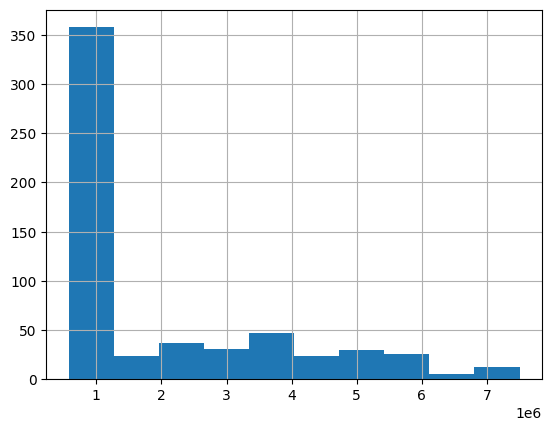

In [ ]:
Y.hist()

<Axes: >

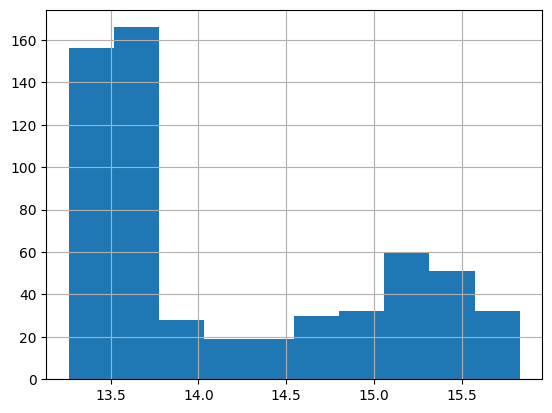

In [ ]:
y_log = np.log(Y)

y_log.hist()

## Model Building

In [ ]:
from math import sqrt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import (GridSearchCV, RandomizedSearchCV)
from sklearn.metrics import (mean_squared_error, mean_absolute_error)
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRFRegressor

from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge,LogisticRegression


In [ ]:
model_scores = []

In [ ]:
def fitAndEvaluateModel(X, Y, model_name, model_algo, params, CV):

  np.random.seed(10)

  print(f"-"*70)
  print(f"INFO")
  print(f"-"*70)

  X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.05)
  print(f"-"*70)
  print(f"Data Splitting Completed for training..")
  print(f"-"*70)
  print(f"Shape Of Train Set : {X_train.shape}")
  print(f"Shape Of Test Set : {X_test.shape}")
  print(f"Shape Of Train Labels : {y_train.shape}")
  print(f"Shape Of Test Labels : {y_test.shape}")
  print(f"-"*70)

  grid = GridSearchCV(
      estimator = model_algo,
      param_grid = params,
      verbose = 1,
      n_jobs = -1,
      cv = CV
  )

  grid_res = grid.fit(X_train, y_train)
  best_params = grid_res.best_params_
  y_pred = grid_res.predict(X_test)

  mse = mean_squared_error(np.exp(y_test), np.exp(y_pred))
  rmse = sqrt(mse)
  mae = mean_absolute_error(np.exp(y_test), np.exp(y_pred))

  model_scores.append({
      'Model': model_name,
      'MSE': mse,
      'RMSE': rmse,
      'MAE': mae
  })

  print(f"-"*70)
  print(f"Model Fitting Completed with GridSearchCV")
  print(f"-"*70)
  print(f"Best Params : {best_params}")
  print(f"MSE : {mse}")
  print(f"RMSE : {rmse}")
  print(f"MAE : {mae}")




> # Random Forest



In [ ]:
params = {
    'n_estimators': [50,100,150, 300,500, 700,1000, 2000],
    'max_depth':[2,3,4,5,6,7]
}

fitAndEvaluateModel(finalDF, y_log, 'RandomForest', RandomForestRegressor(), params, CV=5)

----------------------------------------------------------------------
INFO
----------------------------------------------------------------------
----------------------------------------------------------------------
Data Splitting Completed for training..
----------------------------------------------------------------------
Shape Of Train Set : (563, 673)
Shape Of Test Set : (30, 673)
Shape Of Train Labels : (563,)
Shape Of Test Labels : (30,)
----------------------------------------------------------------------
Fitting 5 folds for each of 48 candidates, totalling 240 fits
----------------------------------------------------------------------
Model Fitting Completed with GridSearchCV
----------------------------------------------------------------------
Best Params : {'max_depth': 7, 'n_estimators': 500}
MSE : 2629580710665.2764
RMSE : 1621598.1964300764
MAE : 1045010.5985533452


In [ ]:
model_scores

[{'Model': 'RandomForest',
  'MSE': 2629580710665.2764,
  'RMSE': 1621598.1964300764,
  'MAE': 1045010.5985533452}]



>> ## Feature Selection With RandomForest





In [ ]:
rf = RandomForestRegressor(n_estimators=500, max_depth=7)
np.random.seed(10)
X_trainFS, X_testFS, y_trainFS, y_testFS = train_test_split(finalDF, y_log,
                                                            test_size=0.05)

rf.fit(X_trainFS, y_trainFS)
rf.score(X_testFS, y_testFS)

0.4496490499895798

<Axes: >

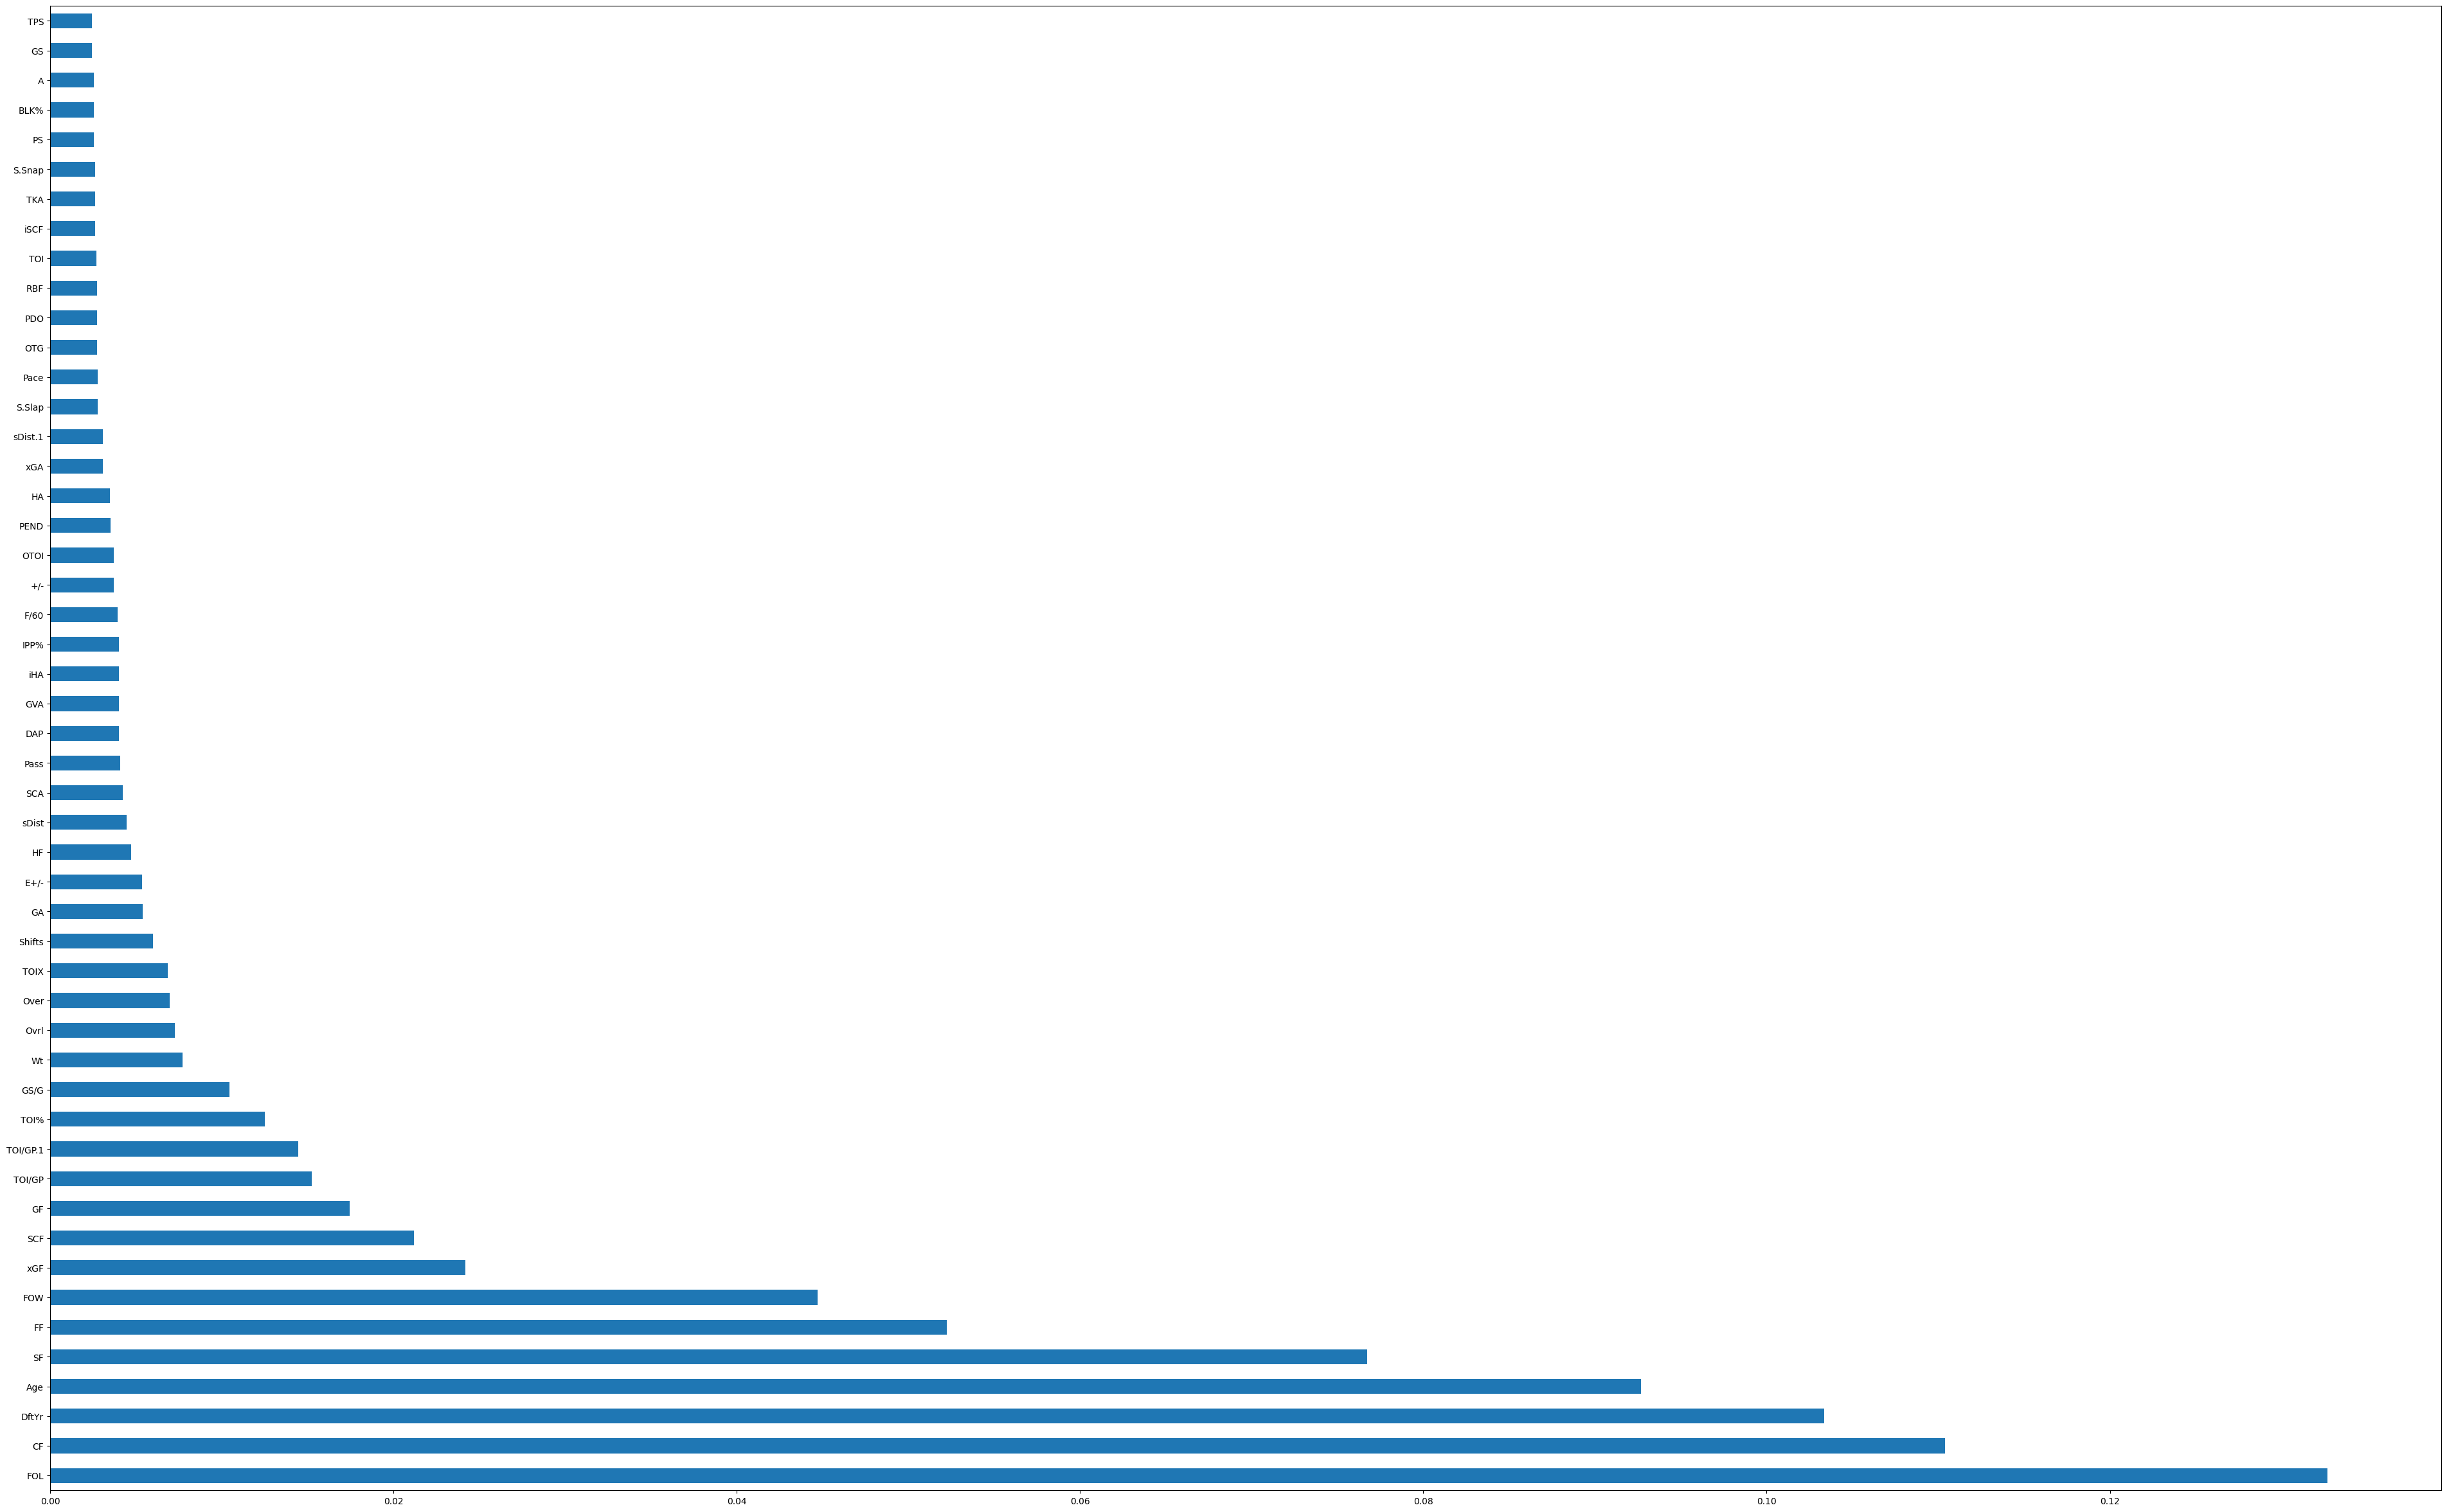

In [ ]:
important_feats = pd.Series(rf.feature_importances_, index=finalDF.columns)

fig, ax = plt.subplots(figsize = (48, 30))

important_feats.nlargest(50).plot(kind='barh')



># SVR



In [ ]:
params = {
    'C': [0.1, 1, 100, 1000],
    'gamma': [0.0001, 0.001, 0.005, 0.1, 1, 3, 5]
}

fitAndEvaluateModel(finalDF, y_log, 'SVC', SVR(), params, CV=5)

----------------------------------------------------------------------
INFO
----------------------------------------------------------------------
----------------------------------------------------------------------
Data Splitting Completed for training..
----------------------------------------------------------------------
Shape Of Train Set : (563, 673)
Shape Of Test Set : (30, 673)
Shape Of Train Labels : (563,)
Shape Of Test Labels : (30,)
----------------------------------------------------------------------
Fitting 5 folds for each of 28 candidates, totalling 140 fits
----------------------------------------------------------------------
Model Fitting Completed with GridSearchCV
----------------------------------------------------------------------
Best Params : {'C': 1, 'gamma': 0.005}
MSE : 2313052910722.5435
RMSE : 1520872.417634873
MAE : 1019049.7598067342


In [ ]:
model_scores

[{'Model': 'RandomForest',
  'MSE': 2629580710665.2764,
  'RMSE': 1621598.1964300764,
  'MAE': 1045010.5985533452},
 {'Model': 'SVC',
  'MSE': 2313052910722.5435,
  'RMSE': 1520872.417634873,
  'MAE': 1019049.7598067342}]



> # Gradient Boosted Trees



In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
params = {
    'n_estimators': [50,100,150, 300,500, 700,1000, 2000],
    'max_depth':[2,3,4,5],
    'min_samples_split':range(200,1001,200),
    'learning_rate':[0.001,0.005,0.01,0.05,0.1,0.5]
}

fitAndEvaluateModel(finalDF, y_log, 'GradientBoostingTree',
                    GradientBoostingRegressor(),
                    params, CV=5)

----------------------------------------------------------------------
INFO
----------------------------------------------------------------------
----------------------------------------------------------------------
Data Splitting Completed for training..
----------------------------------------------------------------------
Shape Of Train Set : (563, 673)
Shape Of Test Set : (30, 673)
Shape Of Train Labels : (563,)
Shape Of Test Labels : (30,)
----------------------------------------------------------------------
Fitting 5 folds for each of 960 candidates, totalling 4800 fits
